In [ ]:
#Ayy lmao

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA




In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
data1 = pd.read_excel('marketing_campaign.xlsx')
data1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
data1.shape

(2240, 29)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#EDA


In [9]:
data1.drop(['ID','Z_Revenue','Z_CostContact'],axis=1,inplace=True)

In [10]:
data1.drop_duplicates(inplace=True)

In [11]:
data1.shape

(2058, 26)

In [12]:
data1.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [13]:
data1.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [14]:
(data1['Income'].isnull().sum()/len(data1))*100

1.1661807580174928

Skew Income =  7.058216394277115


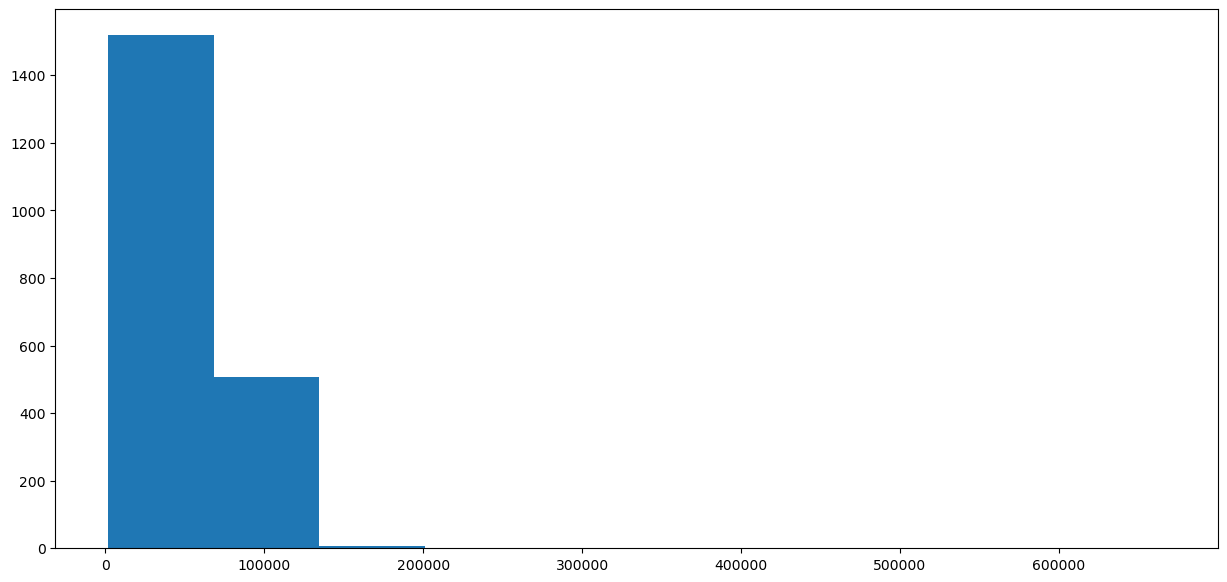

In [15]:
plt.figure(figsize=(15,7))
plt.hist(data1['Income'])
skew1 = data1['Income'].skew()
print('Skew Income = ',skew1)

<Axes: xlabel='Income'>

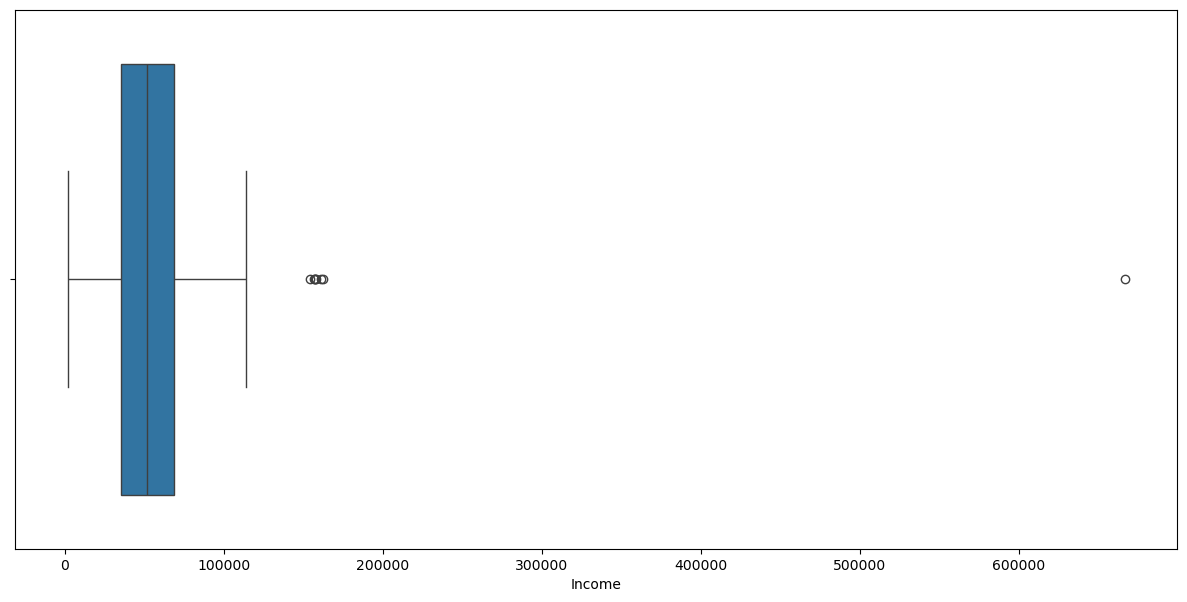

In [16]:
plt.figure(figsize=(15,7))
sb.boxplot(data1['Income'], orient='h')

In [17]:
print('min Income = ',data1['Income'].min())
print('max Income = ',data1['Income'].max())
median_inc = data1['Income'].median()
print('Median Income = ',median_inc)

min Income =  1730.0
max Income =  666666.0
Median Income =  51533.0


In [18]:
data1['Income'] = data1['Income'].fillna(median_inc)
data1['Income']

0        58138.0
1        46344.0
2        71613.0
3        26646.0
4        58293.0
          ...   
2233    666666.0
2235     61223.0
2237     56981.0
2238     69245.0
2239     52869.0
Name: Income, Length: 2058, dtype: float64

In [19]:
data1.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [20]:
data1['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
data1['Marital_Status'] = data1['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
data1['Marital_Status'].unique()


array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [22]:
data1['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [23]:
data1['Education'] = data1['Education'].replace('2n Cycle','Master')
data1['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [24]:
print(data1['Dt_Customer'].min())
print(data1[data1['Dt_Customer'] == data1['Dt_Customer'].min()])
print('-'*125)
print(data1['Dt_Customer'].max())
print(data1[data1['Dt_Customer'] == data1['Dt_Customer'].max()])

2012-07-30 00:00:00
      Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1255        1970       PhD        Married  55158.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
1255  2012-07-30       72       293          0  ...                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1255                  5                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
1255             0             0             0         0         1  

[1 rows x 26 columns]
-----------------------------------------------------------------------------------------------------------------------------
2014-06-29 00:00:00
     Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
200        1952  Graduation       Divorced  69142.0        0         1   
989        1956         PhD          Widow  35340.0        1         1   

 

In [25]:
data1['Dt_Customer'] = data1['Dt_Customer'].dt.year
data1['Dt_Customer'].unique()

array([2012, 2014, 2013])

In [26]:
data1.rename(columns = {'Dt_Customer' : 'Year_Reg'}, inplace=True)
data1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Year_Reg,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,Graduation,Together,666666.0,1,0,2013,23,9,14,...,1,3,6,0,0,0,0,0,0,0
2235,1967,Graduation,Married,61223.0,0,1,2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [27]:
data1.insert(1,'Age',2017 - data1['Year_Birth'])
data1.insert(7,'Tenure',2017 - data1['Year_Reg'])
data1

,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Tenure,Year_Reg,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,60,Graduation,Single,58138.0,0,0,5,2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1954,63,Graduation,Single,46344.0,1,1,3,2014,38,...,1,2,5,0,0,0,0,0,0,0
2,1965,52,Graduation,Together,71613.0,0,0,4,2013,26,...,2,10,4,0,0,0,0,0,0,0
3,1984,33,Graduation,Together,26646.0,1,0,3,2014,26,...,0,4,6,0,0,0,0,0,0,0
4,1981,36,PhD,Married,58293.0,1,0,3,2014,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,40,Graduation,Together,666666.0,1,0,4,2013,23,...,1,3,6,0,0,0,0,0,0,0
2235,1967,50,Graduation,Married,61223.0,0,1,4,2013,46,...,3,4,5,0,0,0,0,0,0,0
2237,1981,36,Graduation,Divorced,56981.0,0,0,3,2014,91,...,3,13,6,0,1,0,0,0,0,0
2238,1956,61,Master,Together,69245.0,0,1,3,2014,8,...,5,10,3,0,0,0,0,0,0,0


In [28]:
data1.drop(columns=['Year_Birth','Year_Reg'], axis=1 , inplace=True)
data1

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Tenure,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,60,Graduation,Single,58138.0,0,0,5,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,63,Graduation,Single,46344.0,1,1,3,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,52,Graduation,Together,71613.0,0,0,4,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,33,Graduation,Together,26646.0,1,0,3,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,36,PhD,Married,58293.0,1,0,3,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,40,Graduation,Together,666666.0,1,0,4,23,9,14,...,1,3,6,0,0,0,0,0,0,0
2235,50,Graduation,Married,61223.0,0,1,4,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2237,36,Graduation,Divorced,56981.0,0,0,3,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,61,Master,Together,69245.0,0,1,3,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [29]:
cat_cols = ['Education', 'Marital_Status', 'AcceptedCmp1',
               'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
num_cols = [col for col in data1.columns if col not in cat_cols]

#for col in cat_cols:
#    data1[col] = data1[col].astype('category')
#for col in num_cols:
#    data1[col] = pd.to_numeric(data1[col])

print('Number of categorical features:', len(cat_cols))
print(cat_cols)
print('--------------')
print('Number of numerical features:', len(num_cols))
print(num_cols)

Number of categorical features: 9
['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
--------------
Number of numerical features: 17
['Age', 'Income', 'Kidhome', 'Teenhome', 'Tenure', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2058 non-null   int64  
 1   Education            2058 non-null   object 
 2   Marital_Status       2058 non-null   object 
 3   Income               2058 non-null   float64
 4   Kidhome              2058 non-null   int64  
 5   Teenhome             2058 non-null   int64  
 6   Tenure               2058 non-null   int32  
 7   Recency              2058 non-null   int64  
 8   MntWines             2058 non-null   int64  
 9   MntFruits            2058 non-null   int64  
 10  MntMeatProducts      2058 non-null   int64  
 11  MntFishProducts      2058 non-null   int64  
 12  MntSweetProducts     2058 non-null   int64  
 13  MntGoldProds         2058 non-null   int64  
 14  NumDealsPurchases    2058 non-null   int64  
 15  NumWebPurchases      2058 non-null   int64 

In [31]:
data1.shape

(2058, 26)

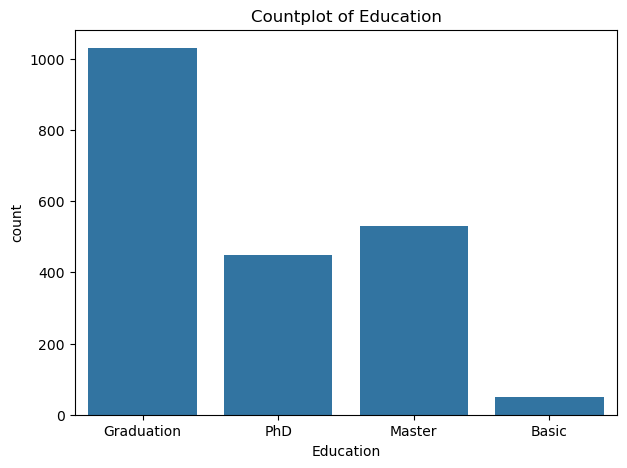


-----------------------------------------------------------------------------------------------------------------------------



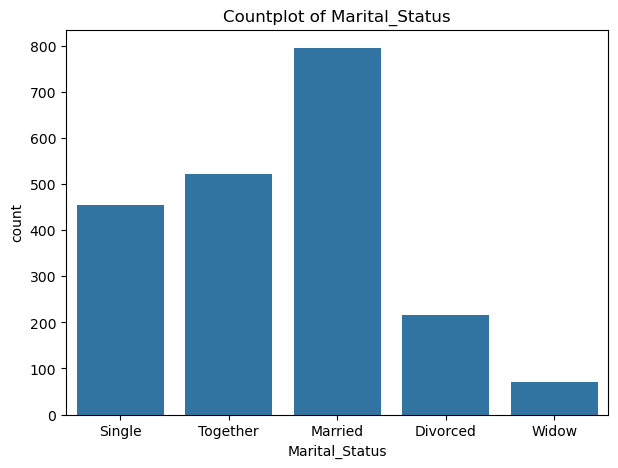


-----------------------------------------------------------------------------------------------------------------------------



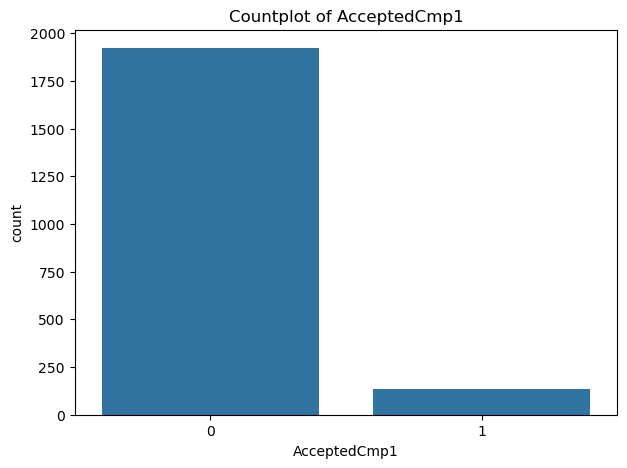


-----------------------------------------------------------------------------------------------------------------------------



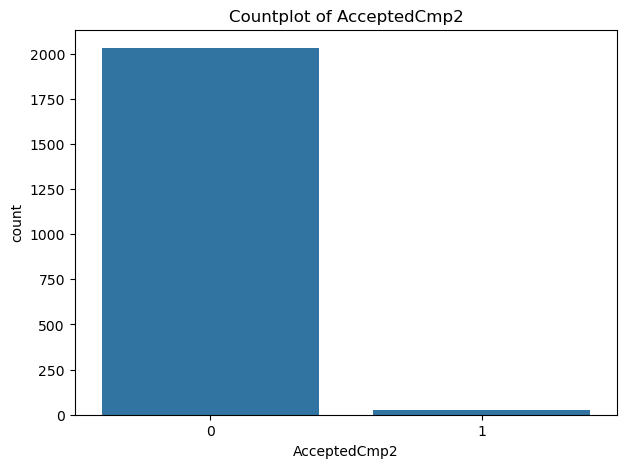


-----------------------------------------------------------------------------------------------------------------------------



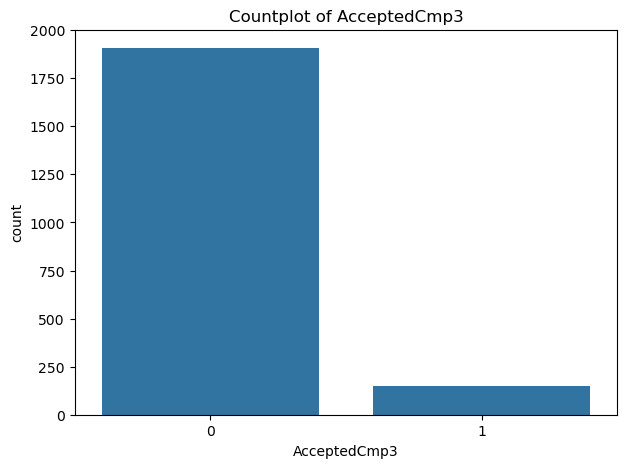


-----------------------------------------------------------------------------------------------------------------------------



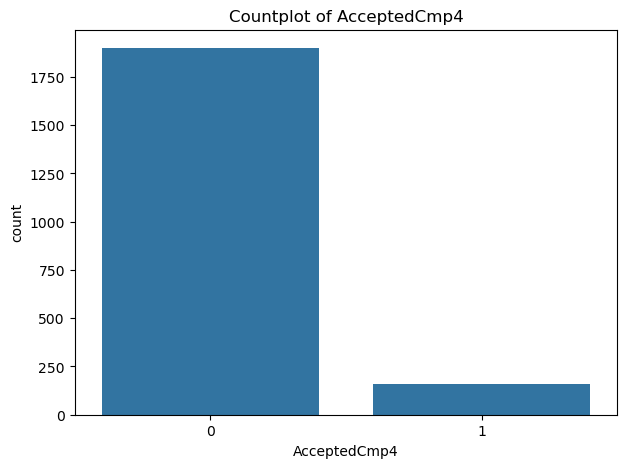


-----------------------------------------------------------------------------------------------------------------------------



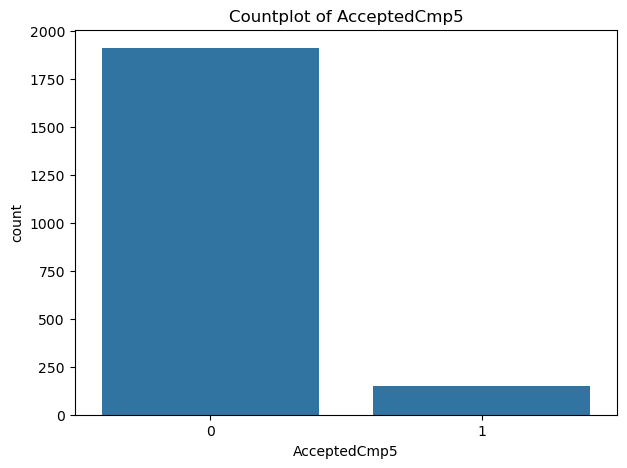


-----------------------------------------------------------------------------------------------------------------------------



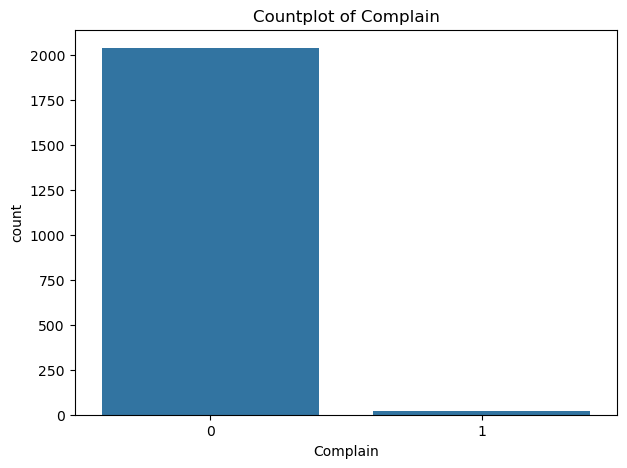


-----------------------------------------------------------------------------------------------------------------------------



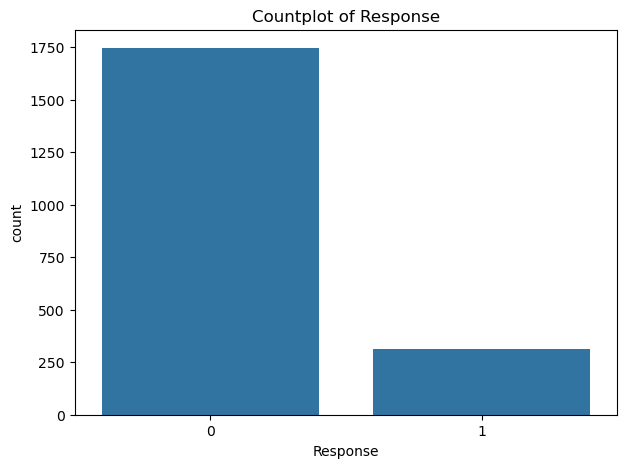


-----------------------------------------------------------------------------------------------------------------------------



In [32]:
for col in cat_cols:
    plt.figure(figsize=(7, 5))
    sb.countplot(x=col, data=data1)
    plt.title(f'Countplot of {col}')
    plt.show()

    print('\n' + "-" * 125 + '\n')


In [33]:
def Outliers(df,column_name):
    Q1=df[column_name].quantile(0.25)
    print('Quartile 1 : ',Q1)
    Q3=df[column_name].quantile(0.75)
    print('Quartile 3 : ',Q3)
    IQR= Q3 - Q1
    print('Inter-Quartile Range : ',IQR)
    UL = Q3 + (1.5 * IQR)
    print('Upper Limit : ',UL)
    LL = Q1 - (1.5 * IQR)
    print('Lower Limit : ', LL)
    a = df[column_name][(df[column_name] > UL) | (df[column_name] < LL)]
    print(a)
    print('No of Outliers = ',a.count())
    print('Percentage of Outliers out of',df.shape[0],'entries = ',round((a.count()/df.shape[0])*100,3),'%')
    print(df.shape)
    print('__________________________________________________________')

In [34]:
for col in num_cols:
  Outliers(data1,col)

Quartile 1 :  40.0
Quartile 3 :  58.0
Inter-Quartile Range :  18.0
Upper Limit :  85.0
Lower Limit :  13.0
192    117
239    124
339    118
Name: Age, dtype: int64
No of Outliers =  3
Percentage of Outliers out of 2058 entries =  0.146 %
(2058, 26)
__________________________________________________________
Quartile 1 :  35701.75
Quartile 3 :  68242.5
Inter-Quartile Range :  32540.75
Upper Limit :  117053.625
Lower Limit :  -13109.375
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64
No of Outliers =  8
Percentage of Outliers out of 2058 entries =  0.389 %
(2058, 26)
__________________________________________________________
Quartile 1 :  0.0
Quartile 3 :  1.0
Inter-Quartile Range :  1.0
Upper Limit :  2.5
Lower Limit :  -1.5
Series([], Name: Kidhome, dtype: int64)
No of Outliers =  0
Percentage of Outliers out of 2058 entries =  0.0 %
(2058, 26)
___________________________

In [35]:
data1.describe()

,Age,Income,Kidhome,Teenhome,Tenure,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,48.212828,52348.172983,0.445578,0.509232,3.968416,48.951895,303.921769,26.234694,167.704568,37.329446,...,2.660836,5.770651,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,0.152089
std,11.973898,25377.757029,0.537556,0.546489,0.685621,28.999189,336.528217,39.750728,228.303238,54.657215,...,2.933824,3.239113,2.439907,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.359195
min,21.000000,1730.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,35701.750000,0.000000,0.000000,3.000000,24.000000,23.000000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,51533.000000,0.000000,0.000000,4.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,68242.500000,1.000000,1.000000,4.000000,74.000000,504.000000,33.000000,229.500000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,124.000000,666666.000000,2.000000,2.000000,5.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
data1.drop(data1[data1['Income'] == 666666].index, inplace=True)
data1.drop(data1[(data1['Age'] == 117) | (data1['Age'] == 118) | (data1['Age'] == 124)].index, inplace=True)
data1.reset_index(drop=True, inplace=True)

In [37]:
data1.shape

(2054, 26)

In [38]:
data_win = data1.copy()

In [39]:
for col in num_cols:
  Outliers(data_win,col)

Quartile 1 :  40.0
Quartile 3 :  58.0
Inter-Quartile Range :  18.0
Upper Limit :  85.0
Lower Limit :  13.0
Series([], Name: Age, dtype: int64)
No of Outliers =  0
Percentage of Outliers out of 2054 entries =  0.0 %
(2054, 26)
__________________________________________________________
Quartile 1 :  35691.25
Quartile 3 :  68146.5
Inter-Quartile Range :  32455.25
Upper Limit :  116829.375
Lower Limit :  -12991.625
163     157243.0
601     162397.0
637     153924.0
666     160803.0
1241    157733.0
1545    157146.0
1961    156924.0
Name: Income, dtype: float64
No of Outliers =  7
Percentage of Outliers out of 2054 entries =  0.341 %
(2054, 26)
__________________________________________________________
Quartile 1 :  0.0
Quartile 3 :  1.0
Inter-Quartile Range :  1.0
Upper Limit :  2.5
Lower Limit :  -1.5
Series([], Name: Kidhome, dtype: int64)
No of Outliers =  0
Percentage of Outliers out of 2054 entries =  0.0 %
(2054, 26)
__________________________________________________________
Quartile

In [40]:
data1.describe()

,Age,Income,Kidhome,Teenhome,Tenure,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,...,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,48.112463,52037.740993,0.445472,0.509737,3.968841,48.959104,304.130477,26.205940,167.742454,37.340798,...,2.662123,5.776534,5.322298,0.073515,0.076923,0.071568,0.065725,0.012658,0.009250,0.152386
std,11.667729,21464.931538,0.537622,0.546568,0.685955,28.993680,336.522007,39.696792,228.280438,54.678618,...,2.934710,3.239313,2.440189,0.261044,0.266534,0.257833,0.247862,0.111822,0.095756,0.359482
min,21.000000,1730.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,35691.250000,0.000000,0.000000,3.000000,24.000000,23.000000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,51533.000000,0.000000,0.000000,4.000000,49.000000,174.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,68146.500000,1.000000,1.000000,4.000000,74.000000,504.000000,33.000000,229.500000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,77.000000,162397.000000,2.000000,2.000000,5.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
data_win.describe()

,Age,Income,Kidhome,Teenhome,Tenure,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,...,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,48.112463,52037.740993,0.445472,0.509737,3.968841,48.959104,304.130477,26.205940,167.742454,37.340798,...,2.662123,5.776534,5.322298,0.073515,0.076923,0.071568,0.065725,0.012658,0.009250,0.152386
std,11.667729,21464.931538,0.537622,0.546568,0.685955,28.993680,336.522007,39.696792,228.280438,54.678618,...,2.934710,3.239313,2.440189,0.261044,0.266534,0.257833,0.247862,0.111822,0.095756,0.359482
min,21.000000,1730.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,35691.250000,0.000000,0.000000,3.000000,24.000000,23.000000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,51533.000000,0.000000,0.000000,4.000000,49.000000,174.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,68146.500000,1.000000,1.000000,4.000000,74.000000,504.000000,33.000000,229.500000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,77.000000,162397.000000,2.000000,2.000000,5.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


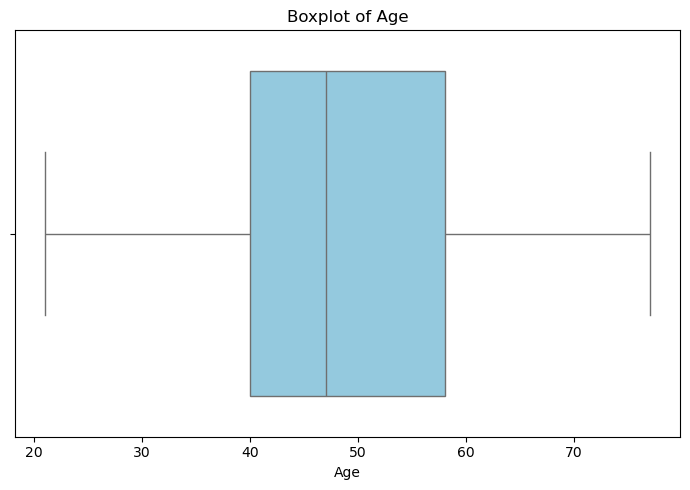


-----------------------------------------------------------------------------------------------------------------------------



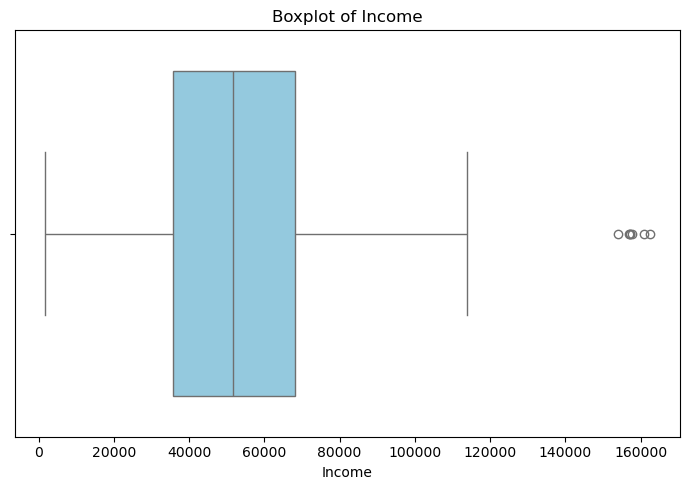


-----------------------------------------------------------------------------------------------------------------------------



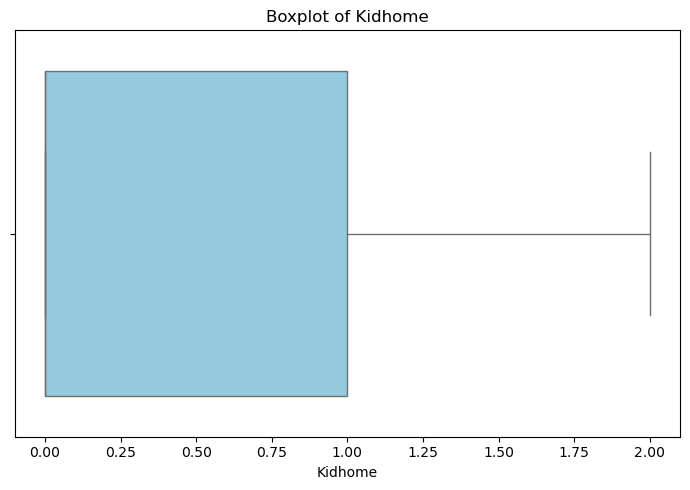


-----------------------------------------------------------------------------------------------------------------------------



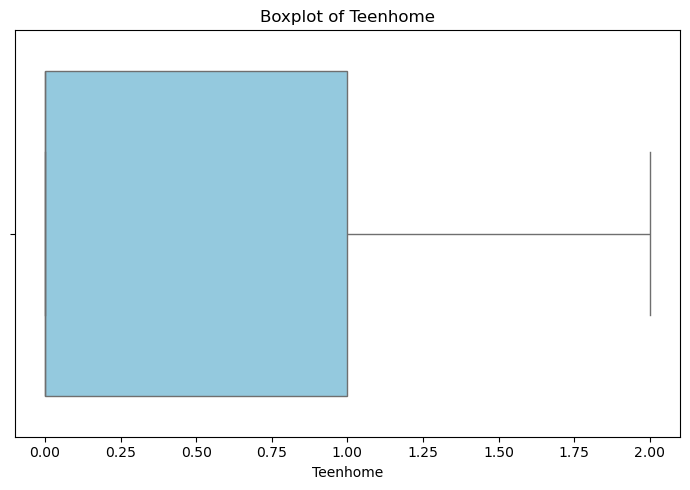


-----------------------------------------------------------------------------------------------------------------------------



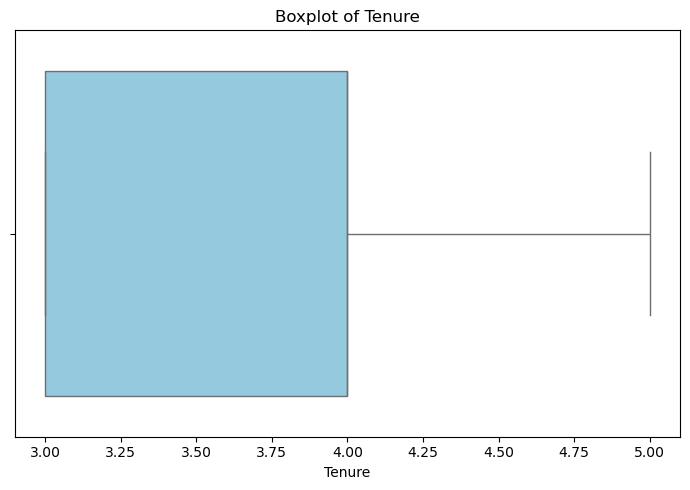


-----------------------------------------------------------------------------------------------------------------------------



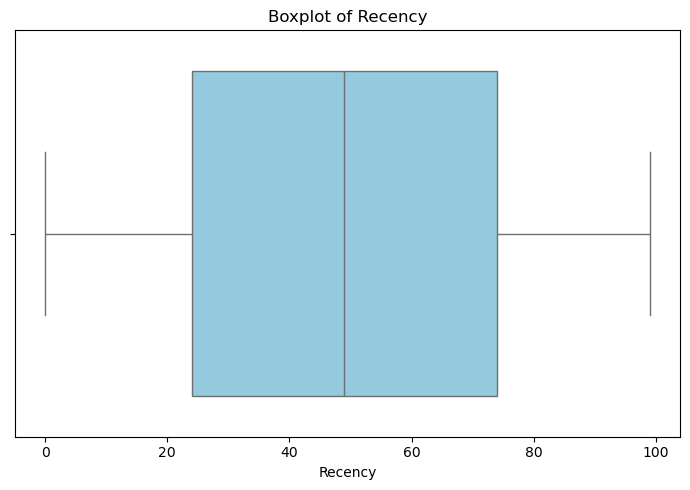


-----------------------------------------------------------------------------------------------------------------------------



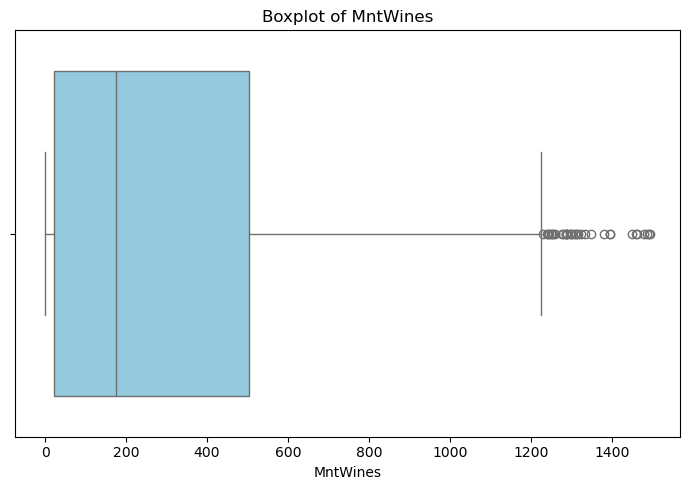


-----------------------------------------------------------------------------------------------------------------------------



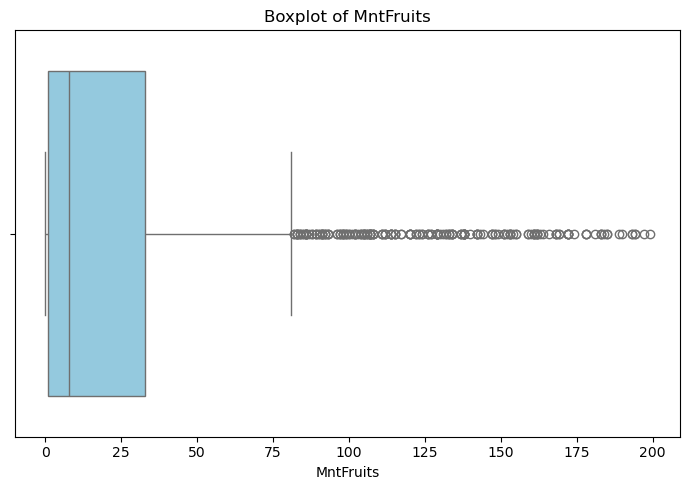


-----------------------------------------------------------------------------------------------------------------------------



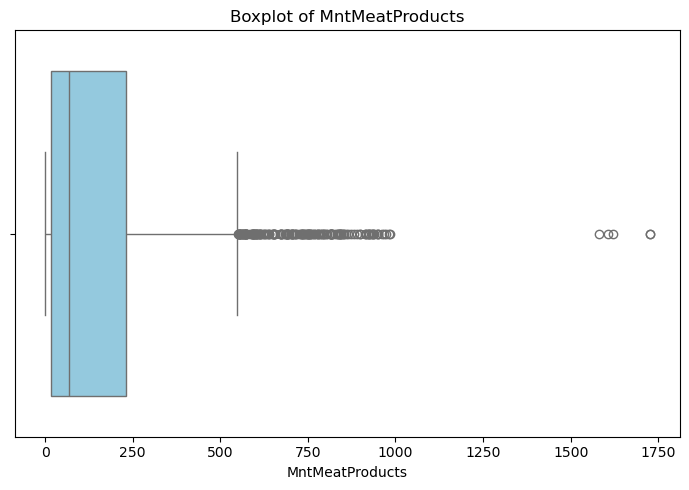


-----------------------------------------------------------------------------------------------------------------------------



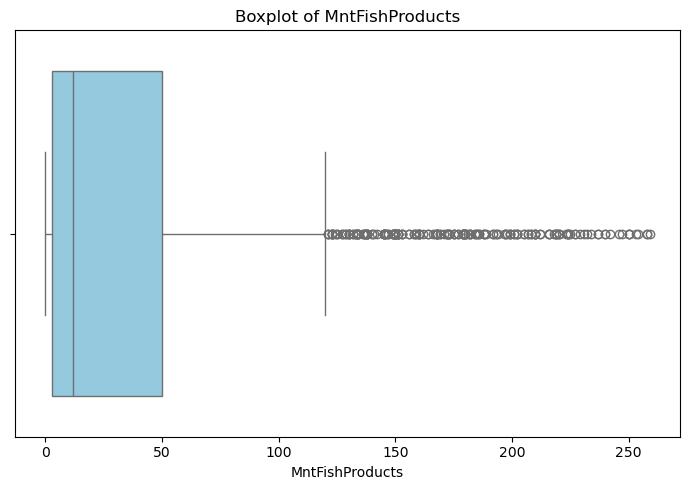


-----------------------------------------------------------------------------------------------------------------------------



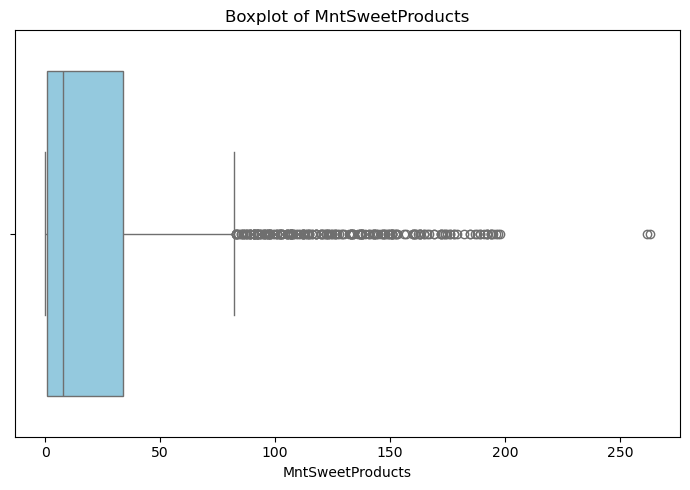


-----------------------------------------------------------------------------------------------------------------------------



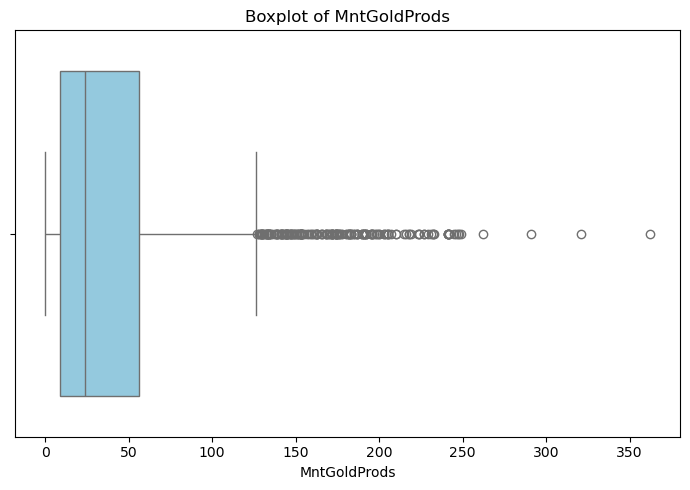


-----------------------------------------------------------------------------------------------------------------------------



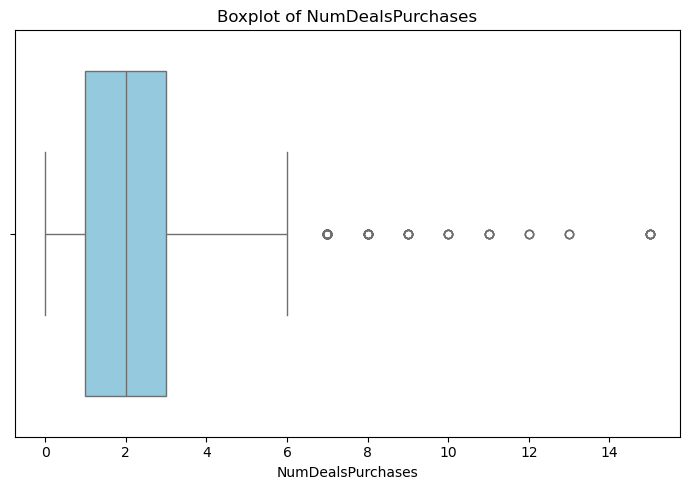


-----------------------------------------------------------------------------------------------------------------------------



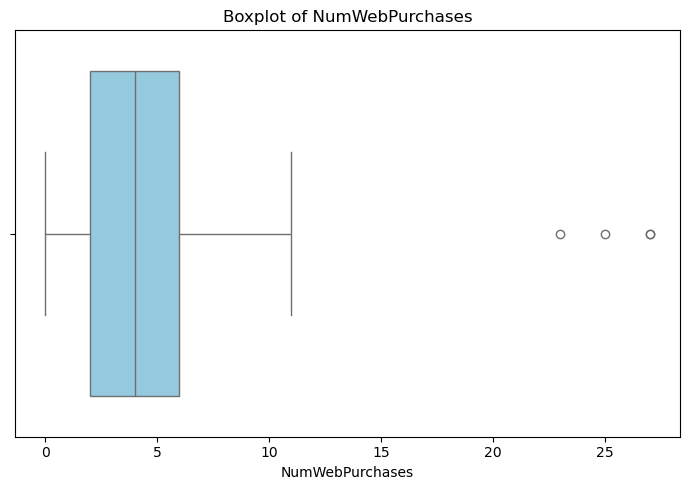


-----------------------------------------------------------------------------------------------------------------------------



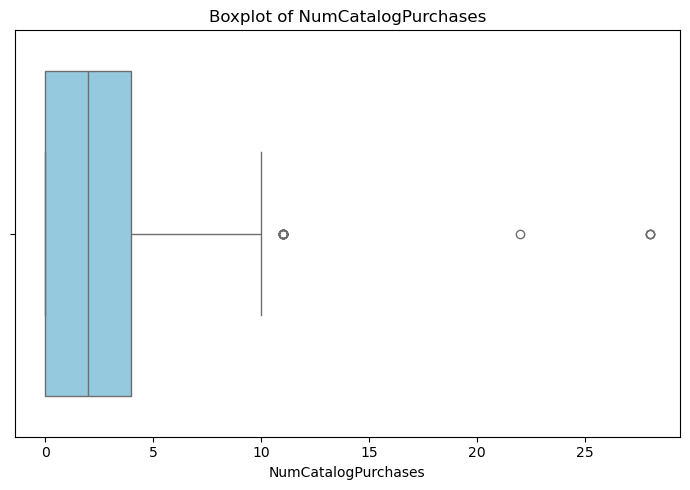


-----------------------------------------------------------------------------------------------------------------------------



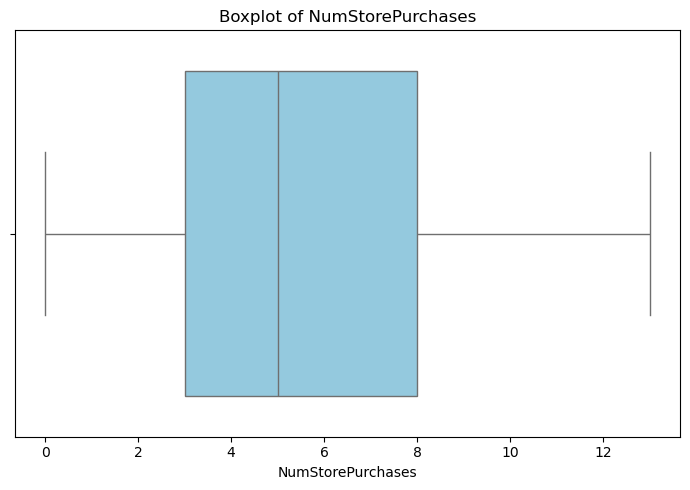


-----------------------------------------------------------------------------------------------------------------------------



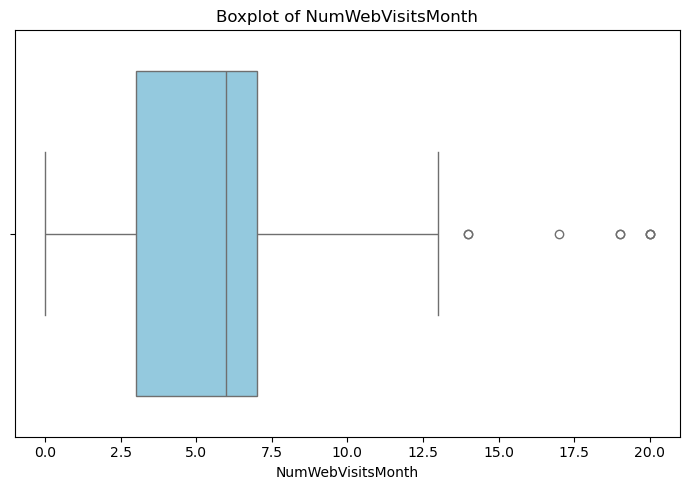


-----------------------------------------------------------------------------------------------------------------------------



In [42]:
for col in num_cols:
  plt.figure(figsize=(7, 5))
  sb.boxplot(data=data1, x=col, color='skyblue')
  plt.title(f'Boxplot of {col}')
  plt.tight_layout()
  plt.show()
  print('\n' + "-" * 125 + '\n')


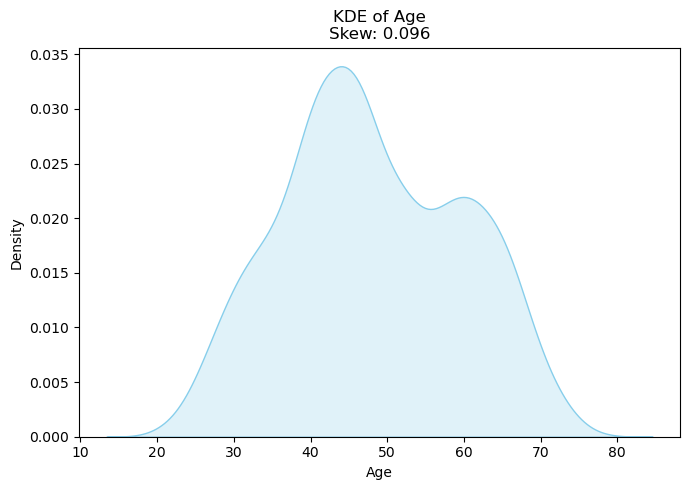


-----------------------------------------------------------------------------------------------------------------------------



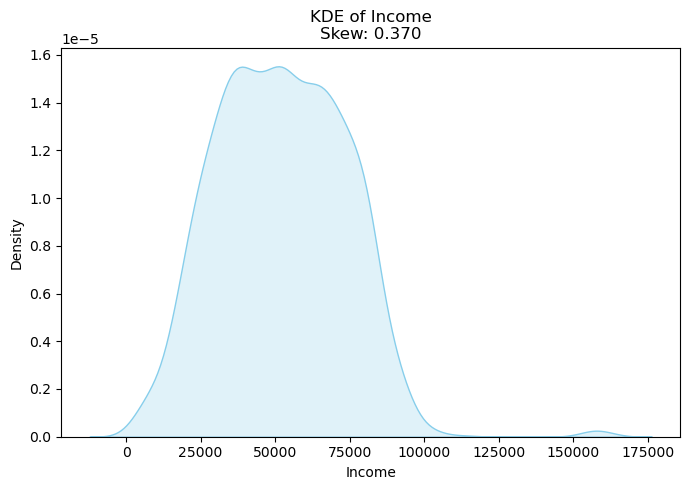


-----------------------------------------------------------------------------------------------------------------------------



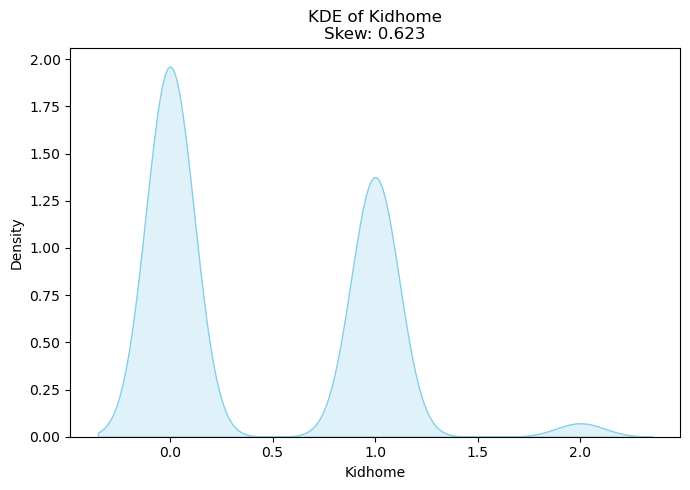


-----------------------------------------------------------------------------------------------------------------------------



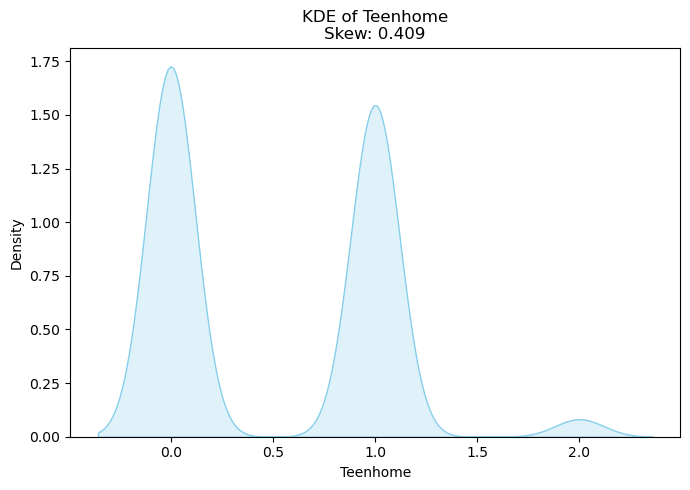


-----------------------------------------------------------------------------------------------------------------------------



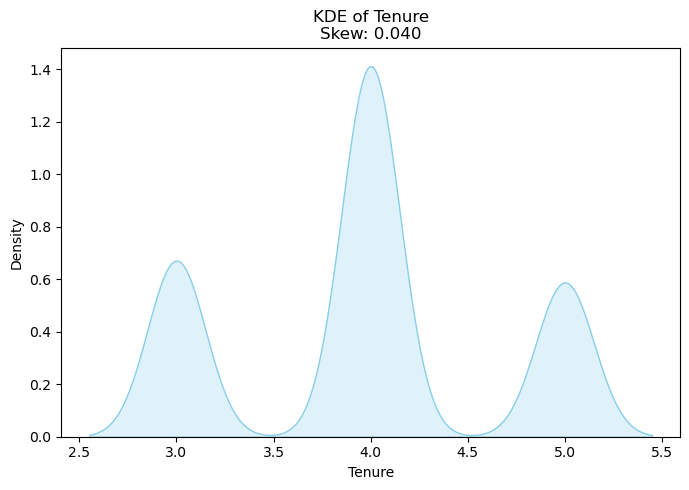


-----------------------------------------------------------------------------------------------------------------------------



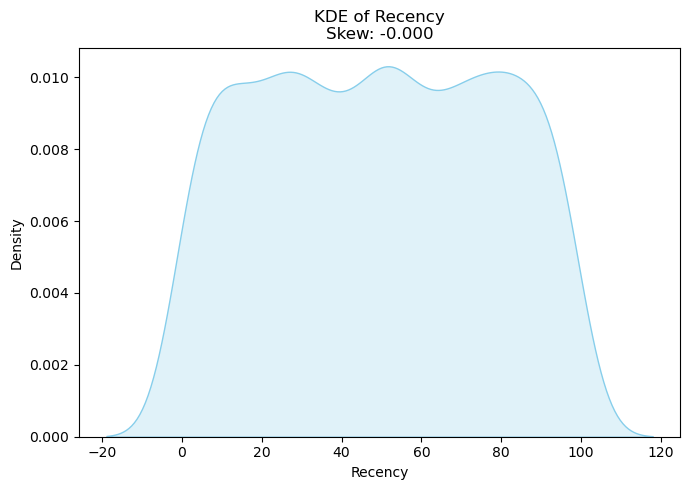


-----------------------------------------------------------------------------------------------------------------------------



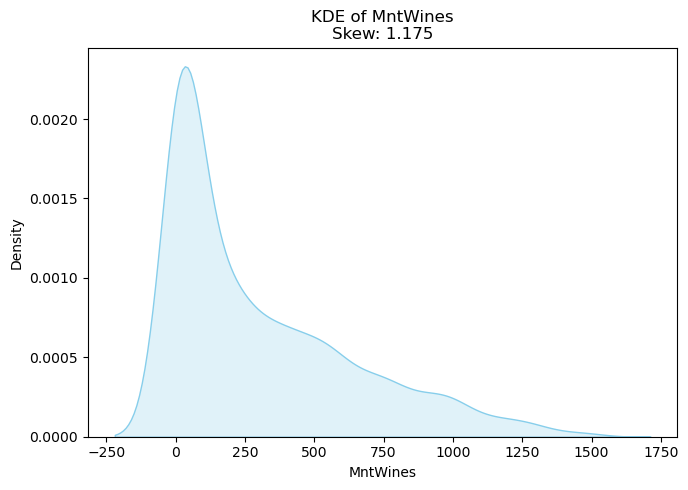


-----------------------------------------------------------------------------------------------------------------------------



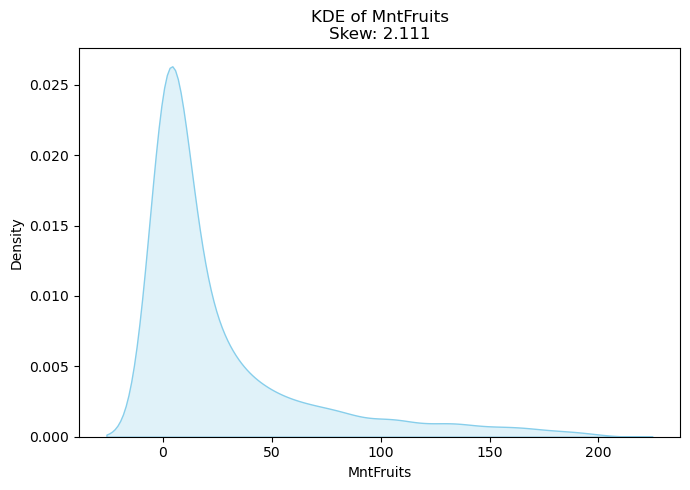


-----------------------------------------------------------------------------------------------------------------------------



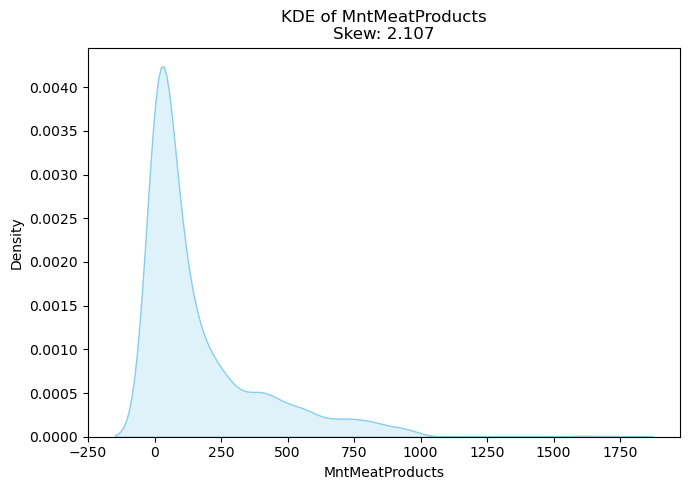


-----------------------------------------------------------------------------------------------------------------------------



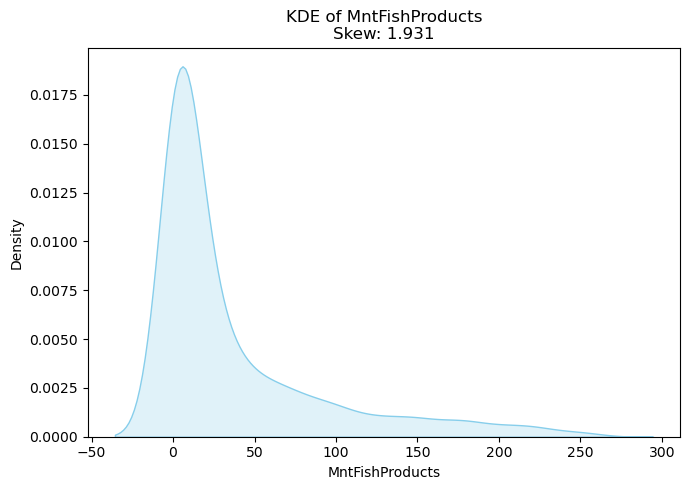


-----------------------------------------------------------------------------------------------------------------------------



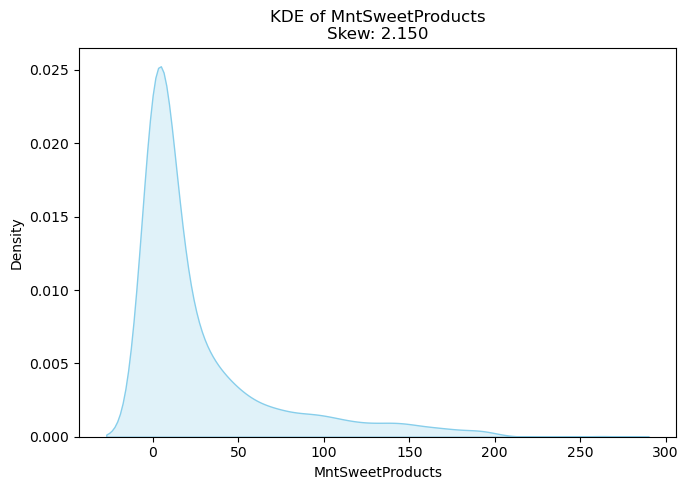


-----------------------------------------------------------------------------------------------------------------------------



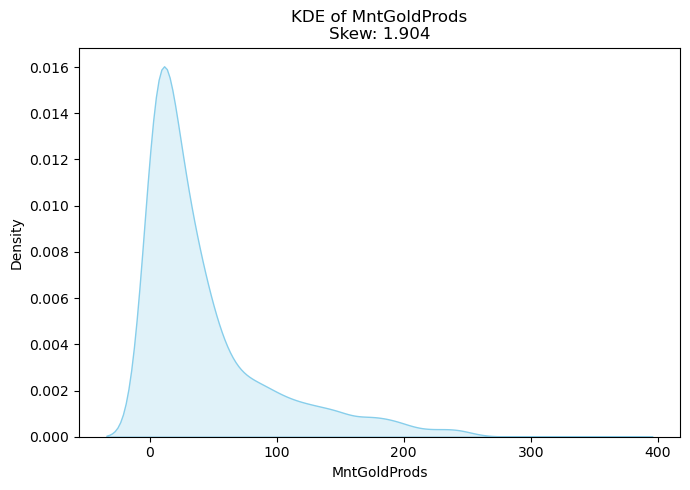


-----------------------------------------------------------------------------------------------------------------------------



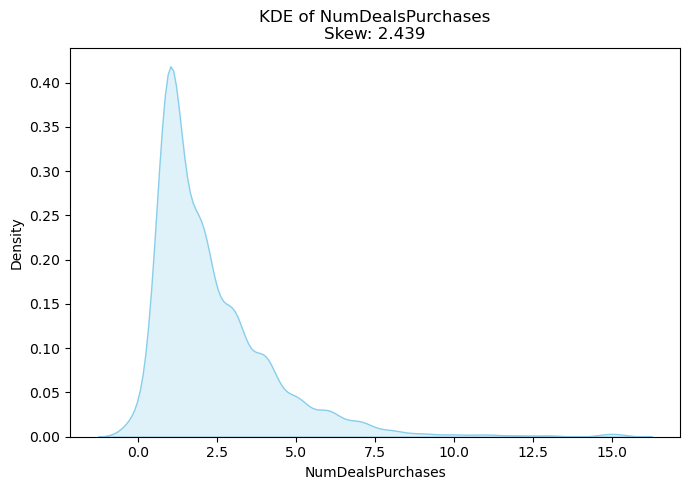


-----------------------------------------------------------------------------------------------------------------------------



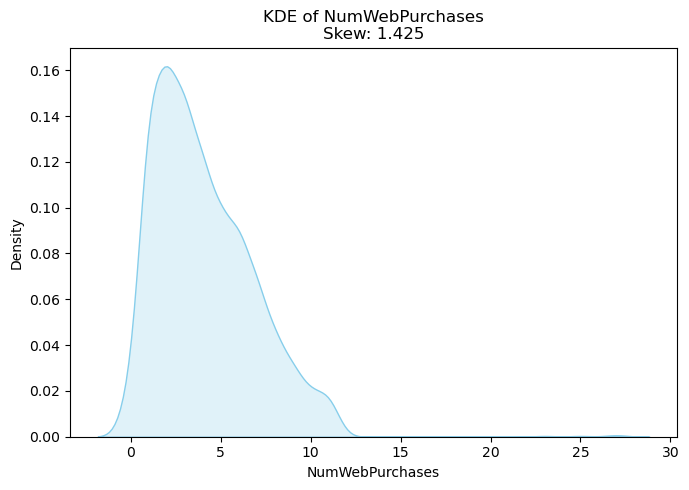


-----------------------------------------------------------------------------------------------------------------------------



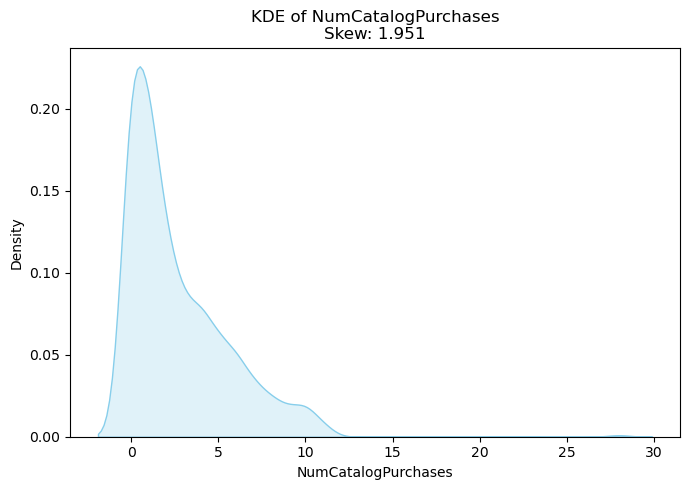


-----------------------------------------------------------------------------------------------------------------------------



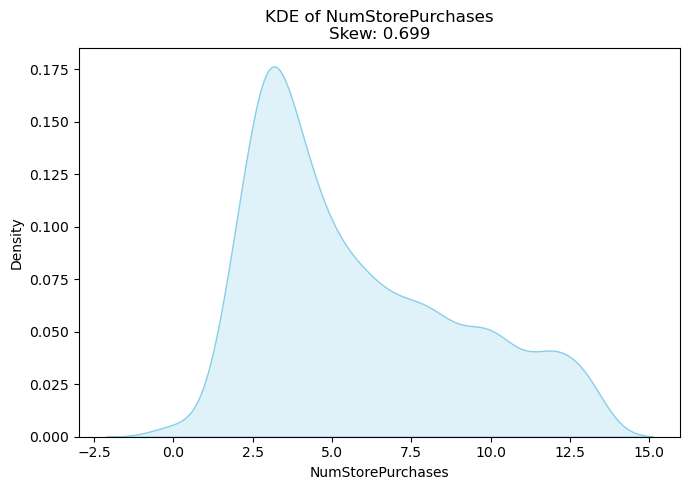


-----------------------------------------------------------------------------------------------------------------------------



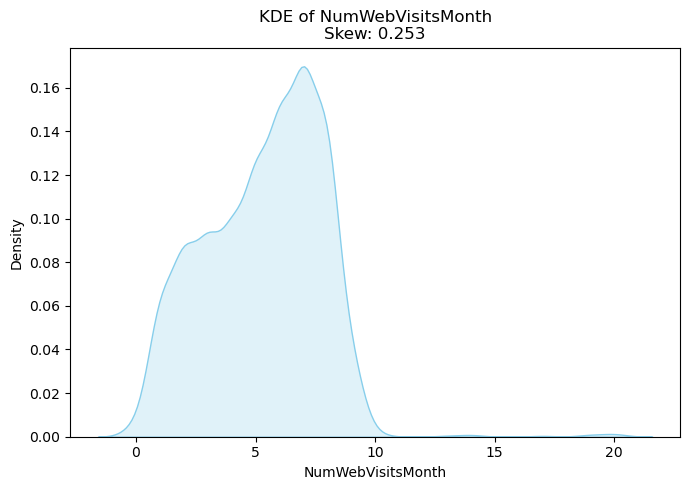


-----------------------------------------------------------------------------------------------------------------------------



In [43]:
for col in num_cols:
    plt.figure(figsize=(7, 5))
    sb.kdeplot(data=data1, x=col,  color='skyblue', fill=True)
    skew_original = data1[col].skew()
    plt.title(f'KDE of {col}\nSkew: {skew_original:.3f}')
    plt.tight_layout()
    plt.show()
    print('\n' + "-" * 125 + '\n')


In [44]:
num_cols

['Age',
 'Income',
 'Kidhome',
 'Teenhome',
 'Tenure',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [45]:
cat_cols

['Education',
 'Marital_Status',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain',
 'Response']

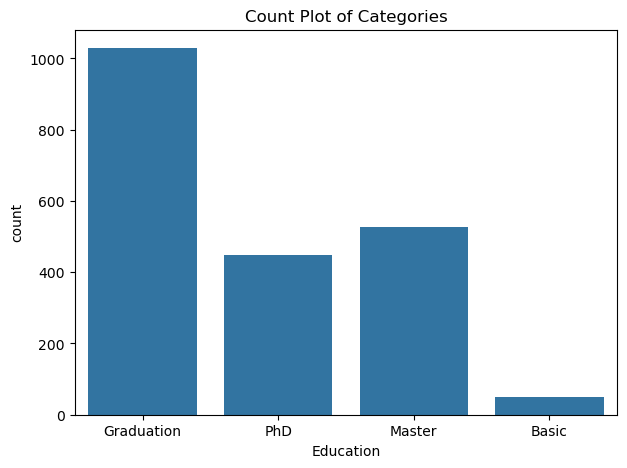

In [46]:
plt.figure(figsize=(7,5))
sb.countplot(data = data_win, x = 'Education')
plt.title('Count Plot of Categories')
plt.show()

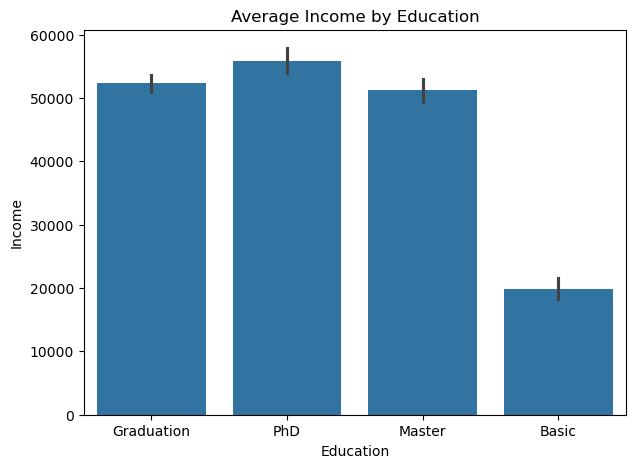

Education
Basic         19913.346939
Graduation    52327.630709
Master        51210.493359
PhD           55850.120267
Name: Income, dtype: float64

In [47]:
plt.figure(figsize=(7,5))
sb.barplot(x='Education', y='Income', data=data_win, estimator='mean')
plt.title('Average Income by Education')
plt.show()
data_win.groupby('Education')['Income'].mean()


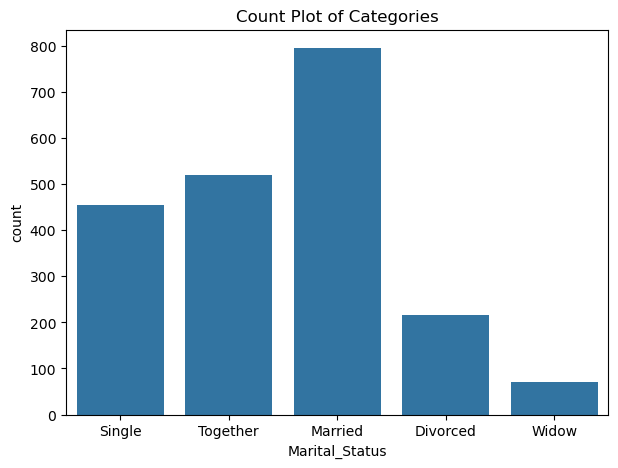

In [48]:
plt.figure(figsize=(7,5))
sb.countplot(data = data_win, x = 'Marital_Status')
plt.title('Count Plot of Categories')
plt.show()

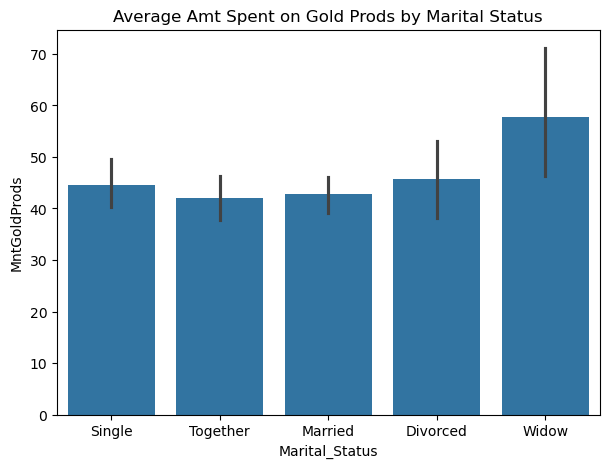

Marital_Status
Divorced    45.651163
Married     42.846541
Single      44.618943
Together    41.992293
Widow       57.732394
Name: MntGoldProds, dtype: float64

In [49]:
plt.figure(figsize=(7,5))
sb.barplot(x='Marital_Status', y='MntGoldProds', data=data_win, estimator='mean')
plt.title('Average Amt Spent on Gold Prods by Marital Status')
plt.show()
data_win.groupby('Marital_Status')['MntGoldProds'].mean()

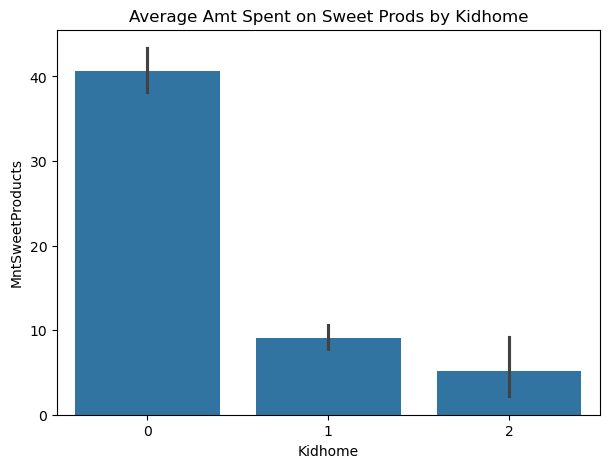

Kidhome
0    40.700508
1     9.084439
2     5.162791
Name: MntSweetProducts, dtype: float64

In [50]:
plt.figure(figsize=(7,5))
sb.barplot(x='Kidhome', y='MntSweetProducts', data=data_win, estimator='mean')
plt.title('Average Amt Spent on Sweet Prods by Kidhome')
plt.show()
data_win.groupby('Kidhome')['MntSweetProducts'].mean()

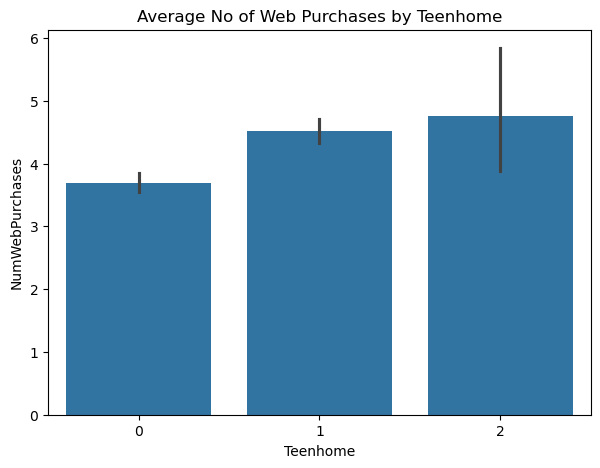

Teenhome
0    3.695364
1    4.520591
2    4.760000
Name: NumWebPurchases, dtype: float64

In [51]:
plt.figure(figsize=(7,5))
sb.barplot(x='Teenhome', y='NumWebPurchases', data=data_win, estimator='mean')
plt.title('Average No of Web Purchases by Teenhome')
plt.show()
data_win.groupby('Teenhome')['NumWebPurchases'].mean()

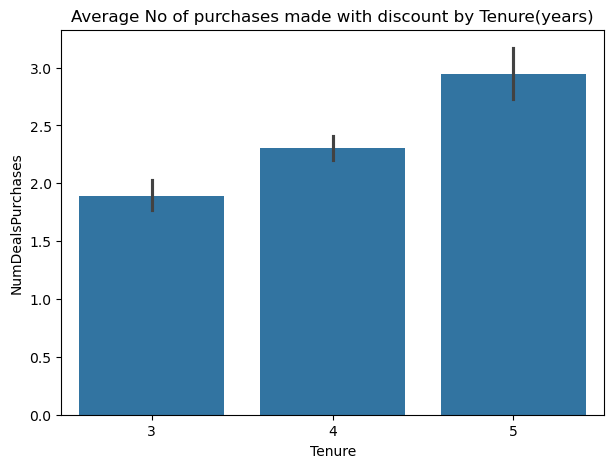

Tenure
3    1.889535
4    2.304788
5    2.940265
Name: NumDealsPurchases, dtype: float64

In [52]:
plt.figure(figsize=(7,5))
sb.barplot(x='Tenure', y='NumDealsPurchases', data=data_win, estimator='mean')
plt.title('Average No of purchases made with discount by Tenure(years)')
plt.show()
data_win.groupby('Tenure')['NumDealsPurchases'].mean()

In [53]:
data_temp = data_win.copy()
bins = [ 20, 30, 40, 50, 60, 70, 80]
labels = ['Twenties', 'Thirties', 'Fourties', 'Fifties', 'Sixties', 'Seventies']
data_temp['Age_Range'] = pd.cut(data_temp['Age'], bins=bins, labels=labels, include_lowest=True)


data_temp.groupby('Age_Range')['MntWines'].mean()




C:\Users\snowy\AppData\Local\Temp\ipykernel_14496\3798021216.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_temp.groupby('Age_Range')['MntWines'].mean()


Age_Range
Twenties     294.114504
Thirties     215.706573
Fourties     278.811094
Fifties      352.615730
Sixties      380.985755
Seventies    519.323529
Name: MntWines, dtype: float64

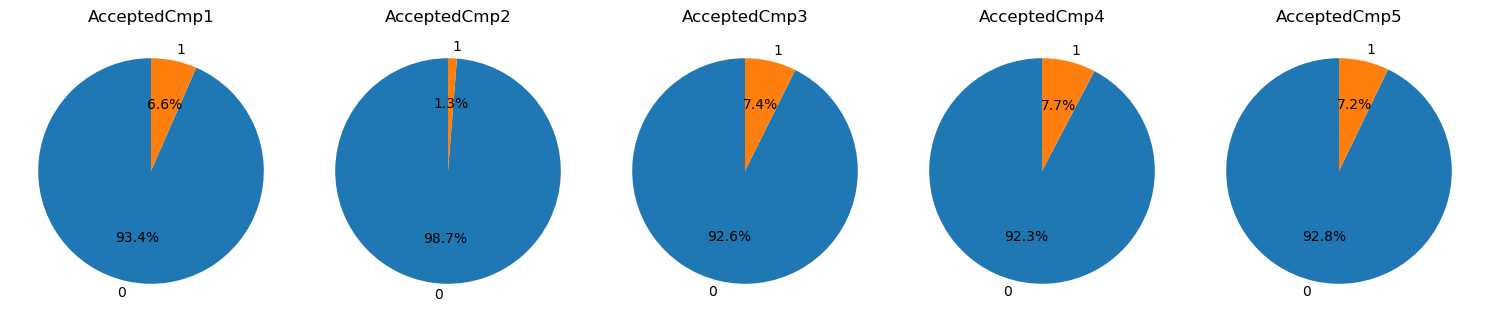

In [54]:
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

fig, axes = plt.subplots(1, len(cmp_cols), figsize=(15, 7))

for i, col in enumerate(cmp_cols):
    value_counts = data_win[col].value_counts()

    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


<Axes: >

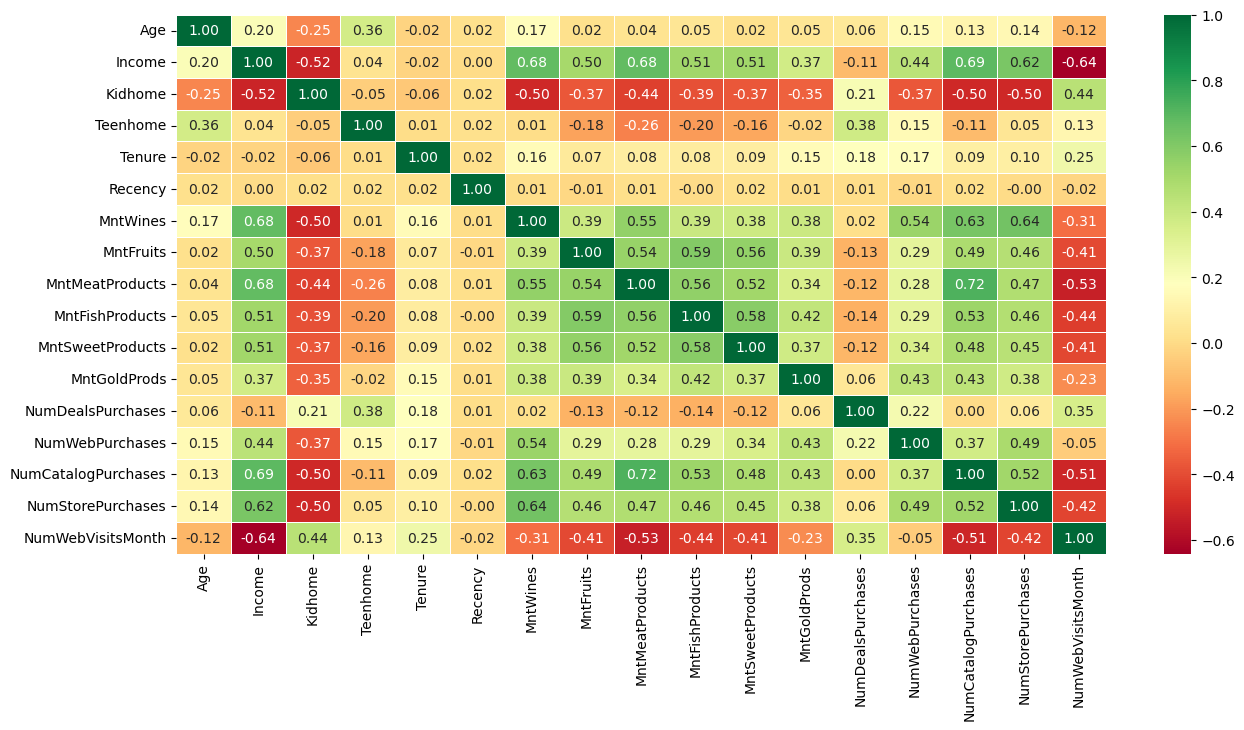

In [55]:
plt.figure(figsize=(15, 7))
sb.heatmap(data_win[num_cols].corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)

#Feature Engg

In [57]:
data_win

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Tenure,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,60,Graduation,Single,58138.0,0,0,5,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,63,Graduation,Single,46344.0,1,1,3,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,52,Graduation,Together,71613.0,0,0,4,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,33,Graduation,Together,26646.0,1,0,3,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,36,PhD,Married,58293.0,1,0,3,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,5,50,5,1,...,0,3,4,0,0,0,0,0,0,0
2050,50,Graduation,Married,61223.0,0,1,4,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2051,36,Graduation,Divorced,56981.0,0,0,3,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2052,61,Master,Together,69245.0,0,1,3,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [58]:
data_win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2054 non-null   int64  
 1   Education            2054 non-null   object 
 2   Marital_Status       2054 non-null   object 
 3   Income               2054 non-null   float64
 4   Kidhome              2054 non-null   int64  
 5   Teenhome             2054 non-null   int64  
 6   Tenure               2054 non-null   int32  
 7   Recency              2054 non-null   int64  
 8   MntWines             2054 non-null   int64  
 9   MntFruits            2054 non-null   int64  
 10  MntMeatProducts      2054 non-null   int64  
 11  MntFishProducts      2054 non-null   int64  
 12  MntSweetProducts     2054 non-null   int64  
 13  MntGoldProds         2054 non-null   int64  
 14  NumDealsPurchases    2054 non-null   int64  
 15  NumWebPurchases      2054 non-null   i

In [59]:
data_f = data_win.copy()

In [60]:
data_f.insert(8, 'Total_Spent', data_f['MntWines'] + data_f['MntFruits'] + data_f['MntMeatProducts'] + data_f['MntFishProducts'] + data_f['MntSweetProducts'] + data_f['MntGoldProds'] )
data_f.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], axis=1, inplace=True)
data_f

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Tenure,Recency,Total_Spent,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,60,Graduation,Single,58138.0,0,0,5,58,1617,3,...,10,4,7,0,0,0,0,0,0,1
1,63,Graduation,Single,46344.0,1,1,3,38,27,2,...,1,2,5,0,0,0,0,0,0,0
2,52,Graduation,Together,71613.0,0,0,4,26,776,1,...,2,10,4,0,0,0,0,0,0,0
3,33,Graduation,Together,26646.0,1,0,3,26,53,2,...,0,4,6,0,0,0,0,0,0,0
4,36,PhD,Married,58293.0,1,0,3,94,422,5,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,5,50,22,1,...,0,3,4,0,0,0,0,0,0,0
2050,50,Graduation,Married,61223.0,0,1,4,46,1341,2,...,3,4,5,0,0,0,0,0,0,0
2051,36,Graduation,Divorced,56981.0,0,0,3,91,1241,1,...,3,13,6,0,1,0,0,0,0,0
2052,61,Master,Together,69245.0,0,1,3,8,843,2,...,5,10,3,0,0,0,0,0,0,0


In [61]:
#Outliers(data_f,'Total_Spent')

In [62]:
data_f.drop(['Tenure','Recency',], axis=1 , inplace = True)

In [63]:
data_f.insert(len(data_f.columns) - 1,'Campaign',1)
data_f['Campaign'] = np.where((data_f['AcceptedCmp1'].astype(int) + data_f['AcceptedCmp2'].astype(int) + data_f['AcceptedCmp3'].astype(int) + data_f['AcceptedCmp4'].astype(int) + data_f['AcceptedCmp5'].astype(int) + data_f['Response'].astype(int)) == 0, 0, 1)
data_f

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Campaign,Response
0,60,Graduation,Single,58138.0,0,0,1617,3,8,10,4,7,0,0,0,0,0,0,1,1
1,63,Graduation,Single,46344.0,1,1,27,2,1,1,2,5,0,0,0,0,0,0,0,0
2,52,Graduation,Together,71613.0,0,0,776,1,8,2,10,4,0,0,0,0,0,0,0,0
3,33,Graduation,Together,26646.0,1,0,53,2,2,0,4,6,0,0,0,0,0,0,0,0
4,36,PhD,Married,58293.0,1,0,422,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,22,1,0,0,3,4,0,0,0,0,0,0,0,0
2050,50,Graduation,Married,61223.0,0,1,1341,2,9,3,4,5,0,0,0,0,0,0,0,0
2051,36,Graduation,Divorced,56981.0,0,0,1241,1,2,3,13,6,0,1,0,0,0,0,1,0
2052,61,Master,Together,69245.0,0,1,843,2,6,5,10,3,0,0,0,0,0,0,0,0


In [64]:
data_f.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1, inplace=True)

In [65]:
data_f

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Campaign
0,60,Graduation,Single,58138.0,0,0,1617,3,8,10,4,7,0,1
1,63,Graduation,Single,46344.0,1,1,27,2,1,1,2,5,0,0
2,52,Graduation,Together,71613.0,0,0,776,1,8,2,10,4,0,0
3,33,Graduation,Together,26646.0,1,0,53,2,2,0,4,6,0,0
4,36,PhD,Married,58293.0,1,0,422,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,22,1,0,0,3,4,0,0
2050,50,Graduation,Married,61223.0,0,1,1341,2,9,3,4,5,0,0
2051,36,Graduation,Divorced,56981.0,0,0,1241,1,2,3,13,6,0,1
2052,61,Master,Together,69245.0,0,1,843,2,6,5,10,3,0,0


In [66]:
#data_f['Campaign'] = data_f['Campaign'].astype('category')

data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2054 non-null   int64  
 1   Education            2054 non-null   object 
 2   Marital_Status       2054 non-null   object 
 3   Income               2054 non-null   float64
 4   Kidhome              2054 non-null   int64  
 5   Teenhome             2054 non-null   int64  
 6   Total_Spent          2054 non-null   int64  
 7   NumDealsPurchases    2054 non-null   int64  
 8   NumWebPurchases      2054 non-null   int64  
 9   NumCatalogPurchases  2054 non-null   int64  
 10  NumStorePurchases    2054 non-null   int64  
 11  NumWebVisitsMonth    2054 non-null   int64  
 12  Complain             2054 non-null   int64  
 13  Campaign             2054 non-null   int32  
dtypes: float64(1), int32(1), int64(10), object(2)
memory usage: 216.8+ KB


In [67]:
data_f[['NumWebVisitsMonth','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','NumDealsPurchases']].describe()

,NumWebVisitsMonth,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,NumDealsPurchases
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,5.322298,5.776534,2.662123,4.101753,2.340312
std,2.440189,3.239313,2.934710,2.798975,1.943819
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.000000,2.000000,1.000000
50%,6.000000,5.000000,2.000000,4.000000,2.000000
75%,7.000000,8.000000,4.000000,6.000000,3.000000
max,20.000000,13.000000,28.000000,27.000000,15.000000


In [68]:
data_f[['NumWebVisitsMonth','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','NumDealsPurchases']].skew()

NumWebVisitsMonth      0.252650
NumStorePurchases      0.699220
NumCatalogPurchases    1.951477
NumWebPurchases        1.424578
NumDealsPurchases      2.439267
dtype: float64

In [69]:
#b_list = ['NumWebVisitsMonth','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','NumDealsPurchases']
#for col in b_list:
#  data_f[col] = data_f[col].apply(
#      lambda x: 'Low' if x < data_f[col].quantile(0.25) else 'High' if x > data_f[col].quantile(0.75) else 'Moderate')
#  data_f[col] = data_f[col].astype('category')
#data_f[b_list]

In [70]:
data_f

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Campaign
0,60,Graduation,Single,58138.0,0,0,1617,3,8,10,4,7,0,1
1,63,Graduation,Single,46344.0,1,1,27,2,1,1,2,5,0,0
2,52,Graduation,Together,71613.0,0,0,776,1,8,2,10,4,0,0
3,33,Graduation,Together,26646.0,1,0,53,2,2,0,4,6,0,0
4,36,PhD,Married,58293.0,1,0,422,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,22,1,0,0,3,4,0,0
2050,50,Graduation,Married,61223.0,0,1,1341,2,9,3,4,5,0,0
2051,36,Graduation,Divorced,56981.0,0,0,1241,1,2,3,13,6,0,1
2052,61,Master,Together,69245.0,0,1,843,2,6,5,10,3,0,0


<Axes: xlabel='Complain', ylabel='count'>

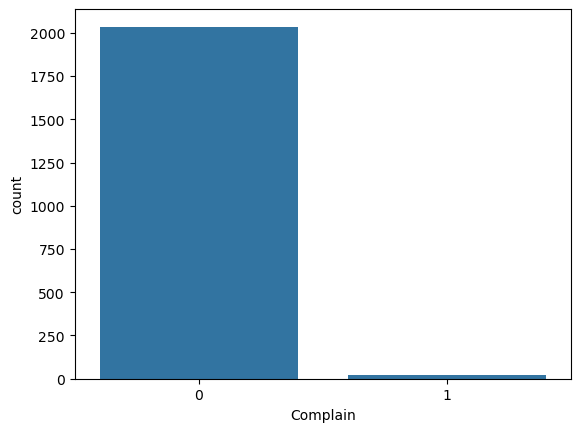

In [71]:
sb.countplot(data_f,x='Complain')

In [72]:
data_f['Complain'].value_counts()

Complain
0    2035
1      19
Name: count, dtype: int64

<Axes: xlabel='Campaign', ylabel='count'>

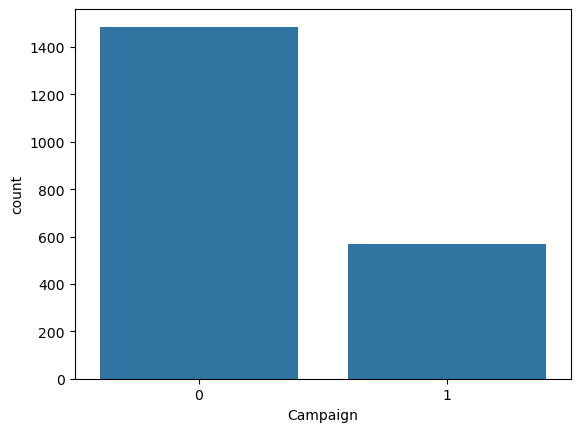

In [73]:
sb.countplot(data_f,x='Campaign')

In [74]:
data_f['Campaign'].value_counts()


Campaign
0    1486
1     568
Name: count, dtype: int64

In [75]:
data_f.drop('Complain',axis=1,inplace=True)

In [76]:
data_f

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign
0,60,Graduation,Single,58138.0,0,0,1617,3,8,10,4,7,1
1,63,Graduation,Single,46344.0,1,1,27,2,1,1,2,5,0
2,52,Graduation,Together,71613.0,0,0,776,1,8,2,10,4,0
3,33,Graduation,Together,26646.0,1,0,53,2,2,0,4,6,0
4,36,PhD,Married,58293.0,1,0,422,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,22,1,0,0,3,4,0
2050,50,Graduation,Married,61223.0,0,1,1341,2,9,3,4,5,0
2051,36,Graduation,Divorced,56981.0,0,0,1241,1,2,3,13,6,1
2052,61,Master,Together,69245.0,0,1,843,2,6,5,10,3,0


#Pre-process


In [78]:
data_f

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign
0,60,Graduation,Single,58138.0,0,0,1617,3,8,10,4,7,1
1,63,Graduation,Single,46344.0,1,1,27,2,1,1,2,5,0
2,52,Graduation,Together,71613.0,0,0,776,1,8,2,10,4,0
3,33,Graduation,Together,26646.0,1,0,53,2,2,0,4,6,0
4,36,PhD,Married,58293.0,1,0,422,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,22,1,0,0,3,4,0
2050,50,Graduation,Married,61223.0,0,1,1341,2,9,3,4,5,0
2051,36,Graduation,Divorced,56981.0,0,0,1241,1,2,3,13,6,1
2052,61,Master,Together,69245.0,0,1,843,2,6,5,10,3,0


In [79]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2054 non-null   int64  
 1   Education            2054 non-null   object 
 2   Marital_Status       2054 non-null   object 
 3   Income               2054 non-null   float64
 4   Kidhome              2054 non-null   int64  
 5   Teenhome             2054 non-null   int64  
 6   Total_Spent          2054 non-null   int64  
 7   NumDealsPurchases    2054 non-null   int64  
 8   NumWebPurchases      2054 non-null   int64  
 9   NumCatalogPurchases  2054 non-null   int64  
 10  NumStorePurchases    2054 non-null   int64  
 11  NumWebVisitsMonth    2054 non-null   int64  
 12  Campaign             2054 non-null   int32  
dtypes: float64(1), int32(1), int64(9), object(2)
memory usage: 200.7+ KB


In [80]:
num_cols = ['Income', 'Age', 'Kidhome', 'Teenhome']

In [81]:
data_num = data_f[num_cols].copy()

In [82]:
data_num

,Income,Age,Kidhome,Teenhome
0,58138.0,60,0,0
1,46344.0,63,1,1
2,71613.0,52,0,0
3,26646.0,33,1,0
4,58293.0,36,1,0
...,...,...,...,...
2049,26816.0,31,0,0
2050,61223.0,50,0,1
2051,56981.0,36,0,0
2052,69245.0,61,0,1


In [83]:
# Standard Scalin


scaler = StandardScaler()
scaled_arr = scaler.fit_transform(data_num)
data_s1 = pd.DataFrame(scaled_arr, columns=num_cols)
data_s1


,Income,Age,Kidhome,Teenhome
0,0.284266,1.019087,-0.828800,-0.932842
1,-0.265322,1.276269,1.031697,0.897203
2,0.912187,0.333268,-0.828800,-0.932842
3,-1.183229,-1.295551,1.031697,-0.932842
4,0.291489,-1.038369,1.031697,-0.932842
...,...,...,...,...
2049,-1.175307,-1.467006,-0.828800,-0.932842
2050,0.428024,0.161814,-0.828800,0.897203
2051,0.230351,-1.038369,-0.828800,-0.932842
2052,0.801840,1.104814,-0.828800,0.897203


In [84]:
data_s1.describe()

,Income,Age,Kidhome,Teenhome
count,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03
mean,3.805243e-17,6.053796e-18,-7.091590e-17,6.572693e-17
std,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00
min,-2.344288e+00,-2.324280e+00,-8.287999e-01,-9.328421e-01
25%,-7.617295e-01,-6.954600e-01,-8.287999e-01,-9.328421e-01
50%,-2.352041e-02,-9.536855e-02,-8.287999e-01,-9.328421e-01
75%,7.506514e-01,8.476323e-01,1.031697e+00,8.972034e-01
max,5.142627e+00,2.476452e+00,2.892195e+00,2.727249e+00


In [85]:
cat_cols = ['Education','Marital_Status']

In [86]:
data_cat = data_f[cat_cols].copy()

In [87]:
# One Hot

encoder = OneHotEncoder(sparse_output=False, categories='auto')
encoded_arr = encoder.fit_transform(data_cat)
encoded_arr = encoded_arr.astype(int)
data_s2 = pd.DataFrame(encoded_arr, columns=encoder.get_feature_names_out(data_cat.columns))
data_s2

,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2049,0,1,0,0,0,0,1,0,0
2050,0,1,0,0,0,1,0,0,0
2051,0,1,0,0,1,0,0,0,0
2052,0,0,1,0,0,0,0,1,0


In [88]:
#data_s2 = pd.get_dummies(data_s2, columns = ['Education','Marital_Status'], dtype = int )

In [89]:
data_t = pd.concat([data_s1, data_s2], axis=1)
data_t

,Income,Age,Kidhome,Teenhome,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.284266,1.019087,-0.828800,-0.932842,0,1,0,0,0,0,1,0,0
1,-0.265322,1.276269,1.031697,0.897203,0,1,0,0,0,0,1,0,0
2,0.912187,0.333268,-0.828800,-0.932842,0,1,0,0,0,0,0,1,0
3,-1.183229,-1.295551,1.031697,-0.932842,0,1,0,0,0,0,0,1,0
4,0.291489,-1.038369,1.031697,-0.932842,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,-1.175307,-1.467006,-0.828800,-0.932842,0,1,0,0,0,0,1,0,0
2050,0.428024,0.161814,-0.828800,0.897203,0,1,0,0,0,1,0,0,0
2051,0.230351,-1.038369,-0.828800,-0.932842,0,1,0,0,1,0,0,0,0
2052,0.801840,1.104814,-0.828800,0.897203,0,0,1,0,0,0,0,1,0


In [90]:
data_t.describe()

,Income,Age,Kidhome,Teenhome,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,3.805243e-17,6.053796e-18,-7.091590e-17,6.572693e-17,0.023856,0.500974,0.256573,0.218598,0.104674,0.387050,0.221032,0.252678,0.034567
std,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,0.152637,0.500121,0.436848,0.413396,0.306207,0.487194,0.415043,0.434653,0.182724
min,-2.344288e+00,-2.324280e+00,-8.287999e-01,-9.328421e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.617295e-01,-6.954600e-01,-8.287999e-01,-9.328421e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.352041e-02,-9.536855e-02,-8.287999e-01,-9.328421e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.506514e-01,8.476323e-01,1.031697e+00,8.972034e-01,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.142627e+00,2.476452e+00,2.892195e+00,2.727249e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
# PCA

pca = PCA(n_components=0.95)
pca_arr = pca.fit_transform(data_t)
data_pca = pd.DataFrame(pca_arr)

In [92]:
data_pca

,0,1,2,3,4,5,6,7
0,0.819014,0.689723,1.185744,-0.243359,-0.711448,-0.326002,0.533731,0.538041
1,0.145572,-1.629533,0.423520,0.617733,-0.745276,-0.387704,0.543964,0.661908
2,0.860037,1.194973,0.562398,0.131220,-0.607472,-0.550319,-0.509616,-0.418554
3,-2.200956,0.353420,-0.000431,-0.133803,-0.534300,-0.586524,-0.470976,-0.542191
4,-1.206034,0.800577,-0.203407,0.947099,0.575111,0.719286,0.470545,-0.648942
...,...,...,...,...,...,...,...,...
2049,-1.247100,1.189598,-0.230276,-1.538577,-0.528508,-0.398508,0.554186,0.329739
2050,1.066437,-0.197211,-0.672996,-0.381448,-0.546542,0.675858,-0.150249,0.032972
2051,-0.201390,1.518076,-0.264411,-0.521622,-0.539765,-0.181963,0.006335,-0.015568
2052,1.763798,-0.496739,0.079456,0.011116,0.671316,-0.660852,-0.817378,0.115379


#Model

In [94]:
data_m = data_f.copy()
data_m

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign
0,60,Graduation,Single,58138.0,0,0,1617,3,8,10,4,7,1
1,63,Graduation,Single,46344.0,1,1,27,2,1,1,2,5,0
2,52,Graduation,Together,71613.0,0,0,776,1,8,2,10,4,0
3,33,Graduation,Together,26646.0,1,0,53,2,2,0,4,6,0
4,36,PhD,Married,58293.0,1,0,422,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,22,1,0,0,3,4,0
2050,50,Graduation,Married,61223.0,0,1,1341,2,9,3,4,5,0
2051,36,Graduation,Divorced,56981.0,0,0,1241,1,2,3,13,6,1
2052,61,Master,Together,69245.0,0,1,843,2,6,5,10,3,0


[10618.433765999534, 7831.201298230082, 6439.366486470005, 5439.40320333534, 4858.506573017227, 4566.280581774259, 4693.811478498825, 4177.61913264246, 4003.3834074220713, 3880.0561173072642]


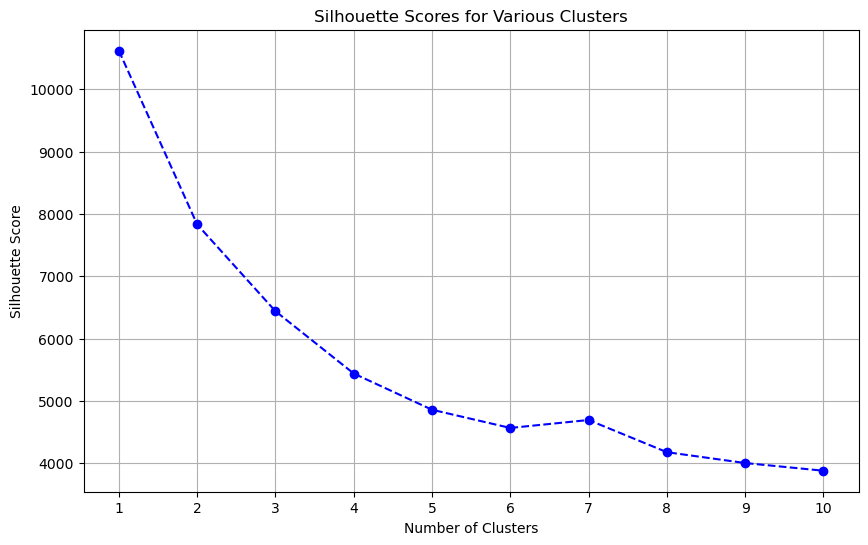

In [95]:
# Elbow

wcss = []
sil_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--', color='b')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

In [96]:
# Kmeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_pca)
data_m['Cluster'] = labels


In [97]:
sil_score_s1 = silhouette_score(data_t, labels)
print('Sil score s1 -->', sil_score_s1)

Sil score s1 --> 0.24265442209550084


In [98]:
data_m

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign,Cluster
0,60,Graduation,Single,58138.0,0,0,1617,3,8,10,4,7,1,0
1,63,Graduation,Single,46344.0,1,1,27,2,1,1,2,5,0,1
2,52,Graduation,Together,71613.0,0,0,776,1,8,2,10,4,0,0
3,33,Graduation,Together,26646.0,1,0,53,2,2,0,4,6,0,2
4,36,PhD,Married,58293.0,1,0,422,5,5,3,6,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,31,Graduation,Single,26816.0,0,0,22,1,0,0,3,4,0,2
2050,50,Graduation,Married,61223.0,0,1,1341,2,9,3,4,5,0,1
2051,36,Graduation,Divorced,56981.0,0,0,1241,1,2,3,13,6,1,0
2052,61,Master,Together,69245.0,0,1,843,2,6,5,10,3,0,1


In [99]:
cat_cols = ['Education', 'Marital_Status', 'Campaign']
num_cols = [col for col in data_f.columns if col not in cat_cols]

print('Number of categorical features:', len(cat_cols))
print(cat_cols)
print('--------------')
print('Number of numerical features:', len(num_cols))
print(num_cols)

Number of categorical features: 3
['Education', 'Marital_Status', 'Campaign']
--------------
Number of numerical features: 10
['Age', 'Income', 'Kidhome', 'Teenhome', 'Total_Spent', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


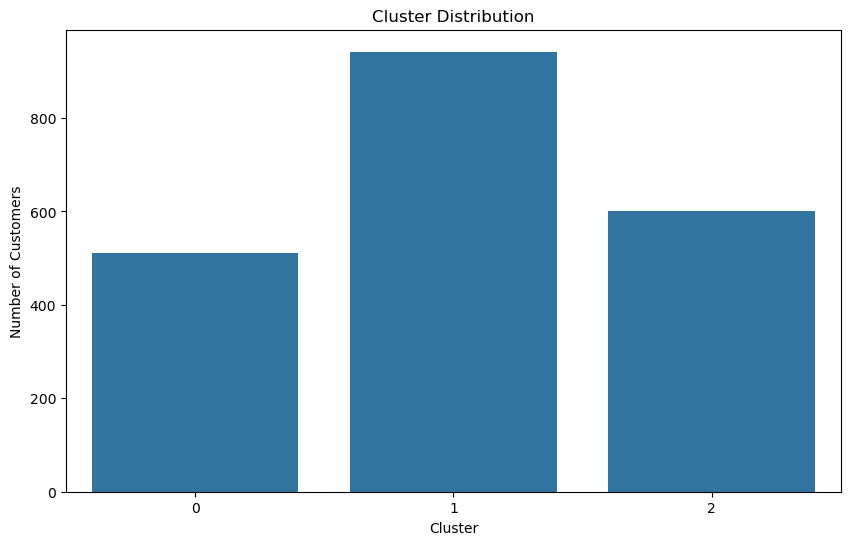

In [100]:
plt.figure(figsize=(10, 6))
sb.countplot(x='Cluster', data=data_m)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


In [101]:
data_m['Cluster'].value_counts()

Cluster
1    942
2    600
0    512
Name: count, dtype: int64

In [102]:
data_m.groupby('Cluster')[num_cols].mean()

,Age,Income,Kidhome,Teenhome,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,,,
0,49.916016,73386.171875,0.025391,0.005859,1272.136719,1.121094,4.791016,5.425781,7.912109,2.982422
1,53.138004,53471.748408,0.363057,1.048832,537.420382,3.112527,4.687898,2.395966,6.092357,5.617834
2,38.683333,31569.021667,0.933333,0.093333,146.761667,2.168333,2.593333,0.721667,3.458333,6.855000


In [103]:
data_m.groupby('Cluster')[cat_cols].apply(lambda x: x.mode())


,,Education,Marital_Status,Campaign
Cluster,,,,
0,0,Graduation,Married,1
1,0,Graduation,Married,0
2,0,Graduation,Married,0


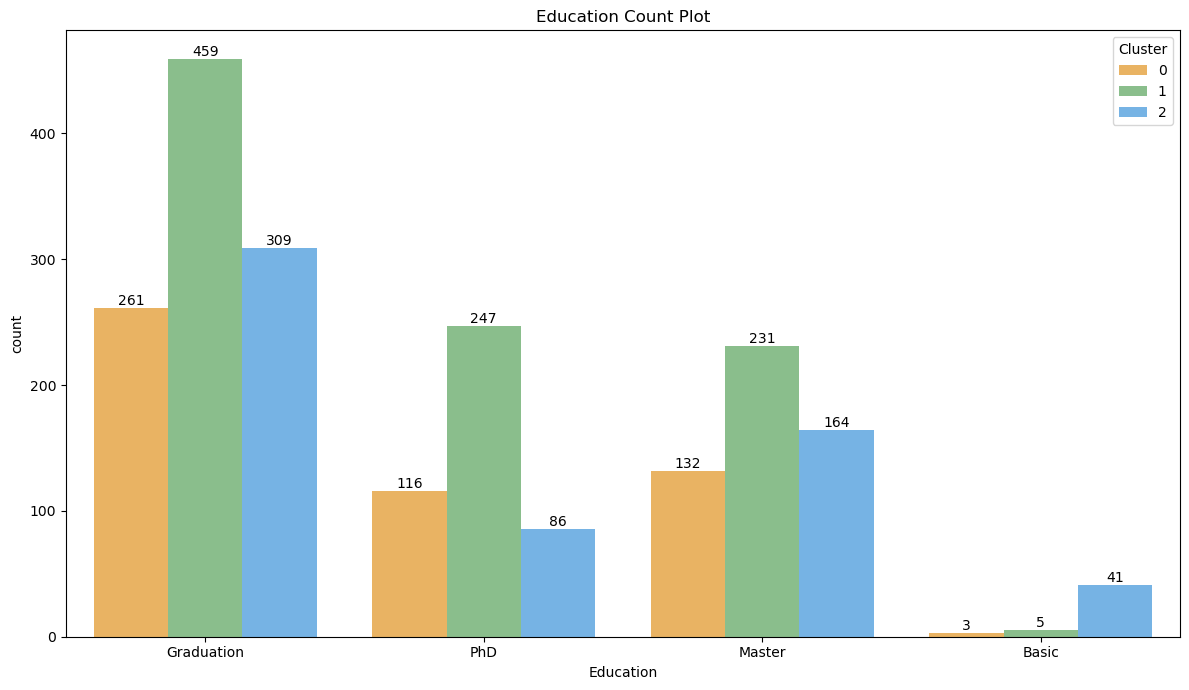

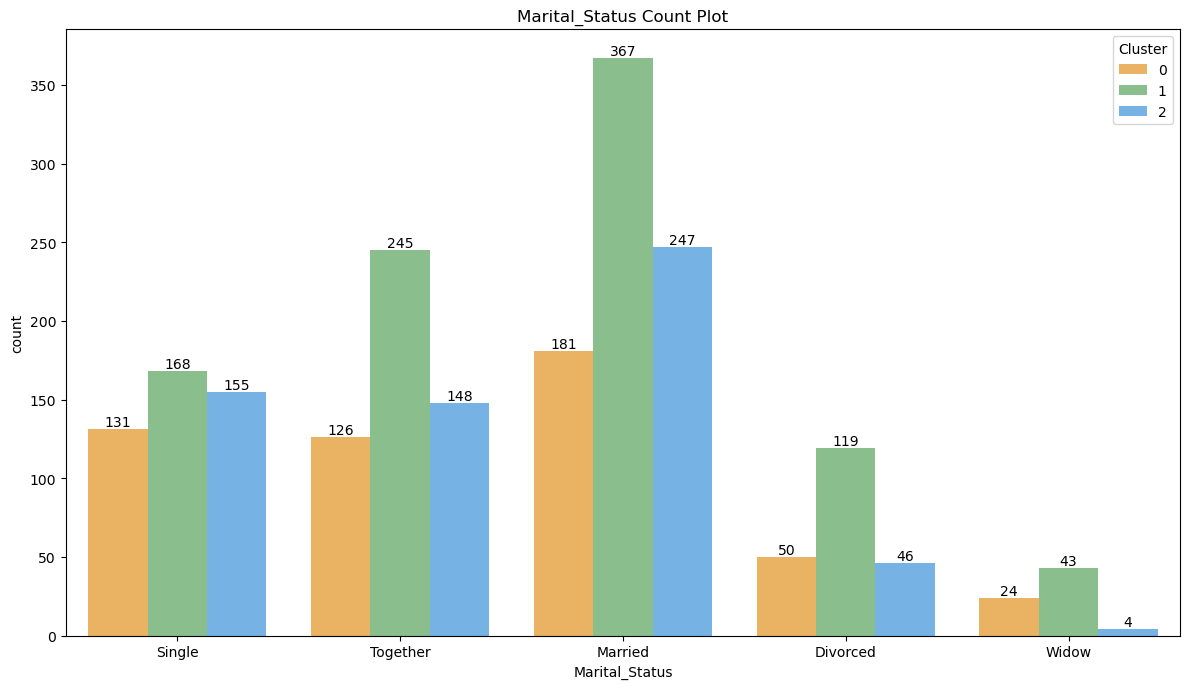

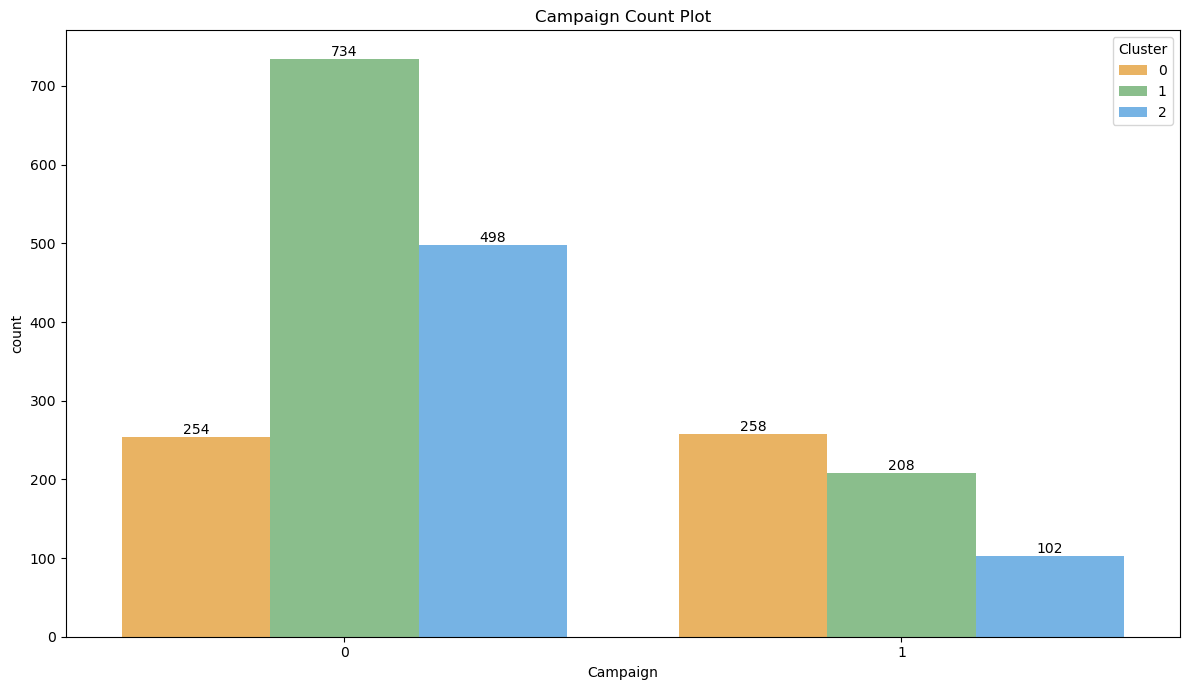

In [104]:
cust_pal = ['#FFB74D', '#81C784', '#64B5F6']
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(12,7))
    ax = sb.countplot(data=data_m, x=col, hue='Cluster', ax=ax, palette=cust_pal)
    ax.set_title(f'{col} Count Plot')
    for x in ax.containers:
        ax.bar_label(x)
    plt.tight_layout()


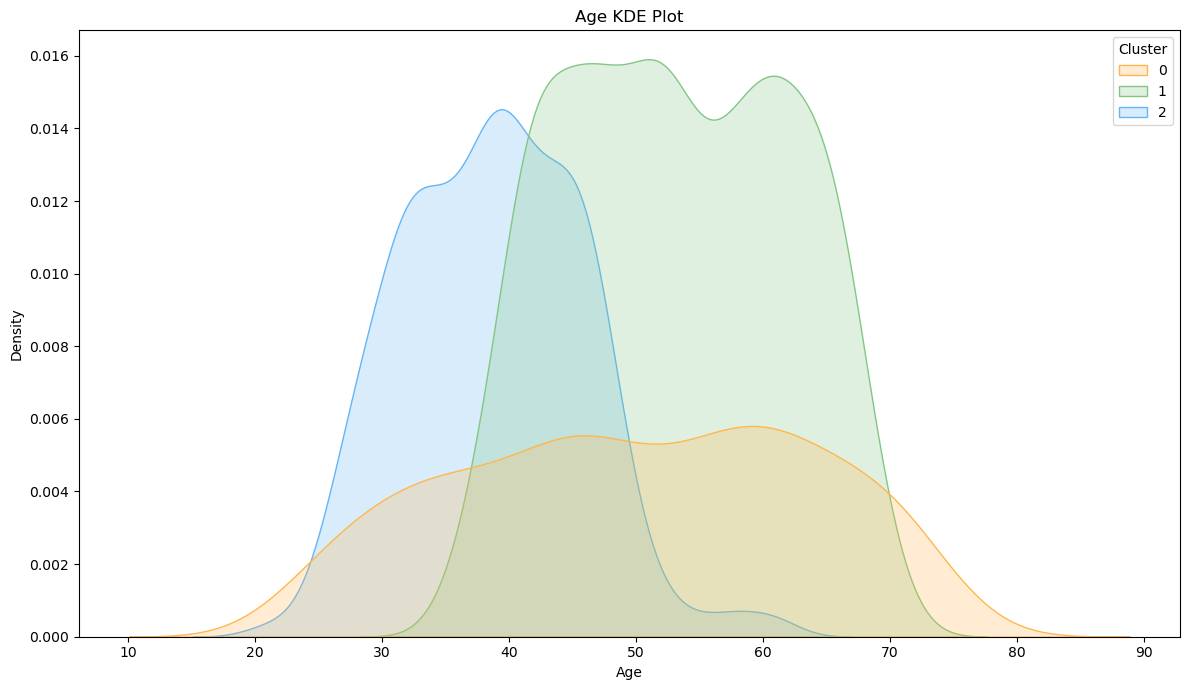


-----------------------------------------------------------------------------------------------------------------------------



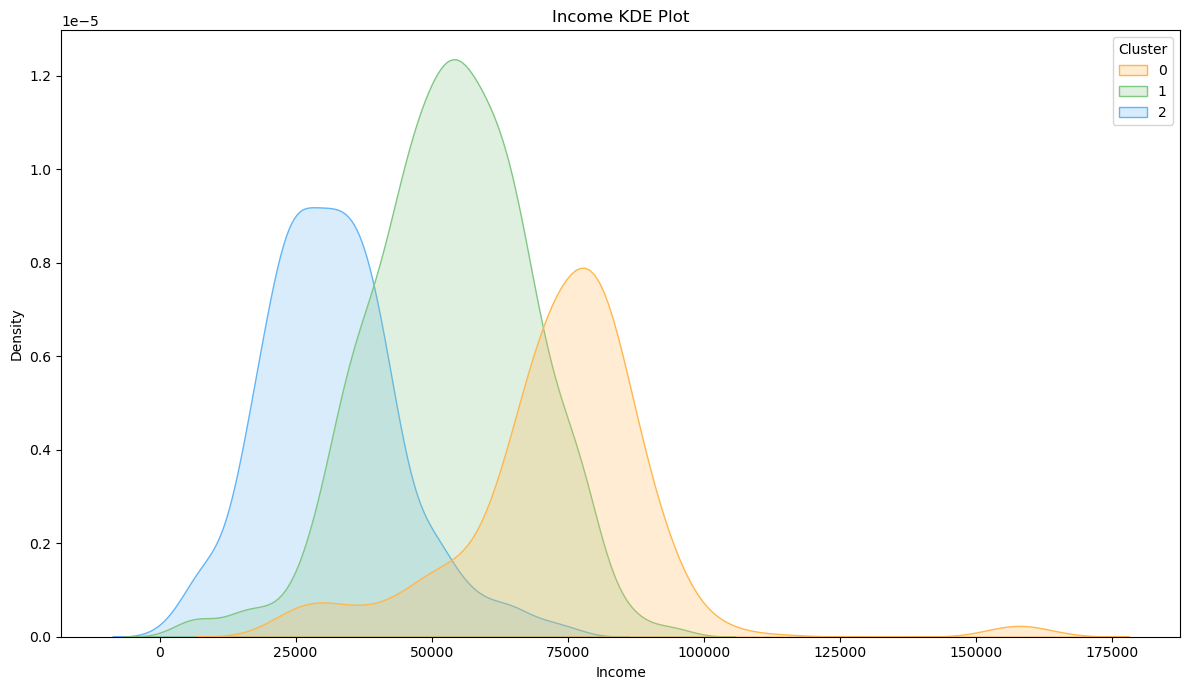


-----------------------------------------------------------------------------------------------------------------------------



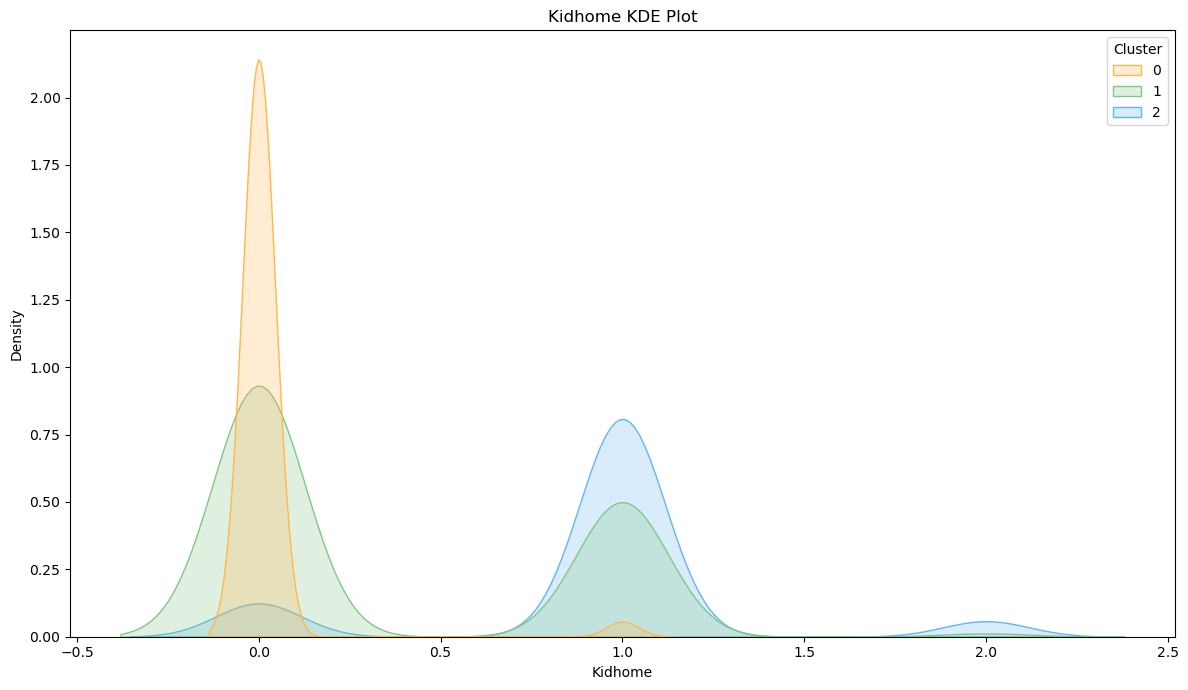


-----------------------------------------------------------------------------------------------------------------------------



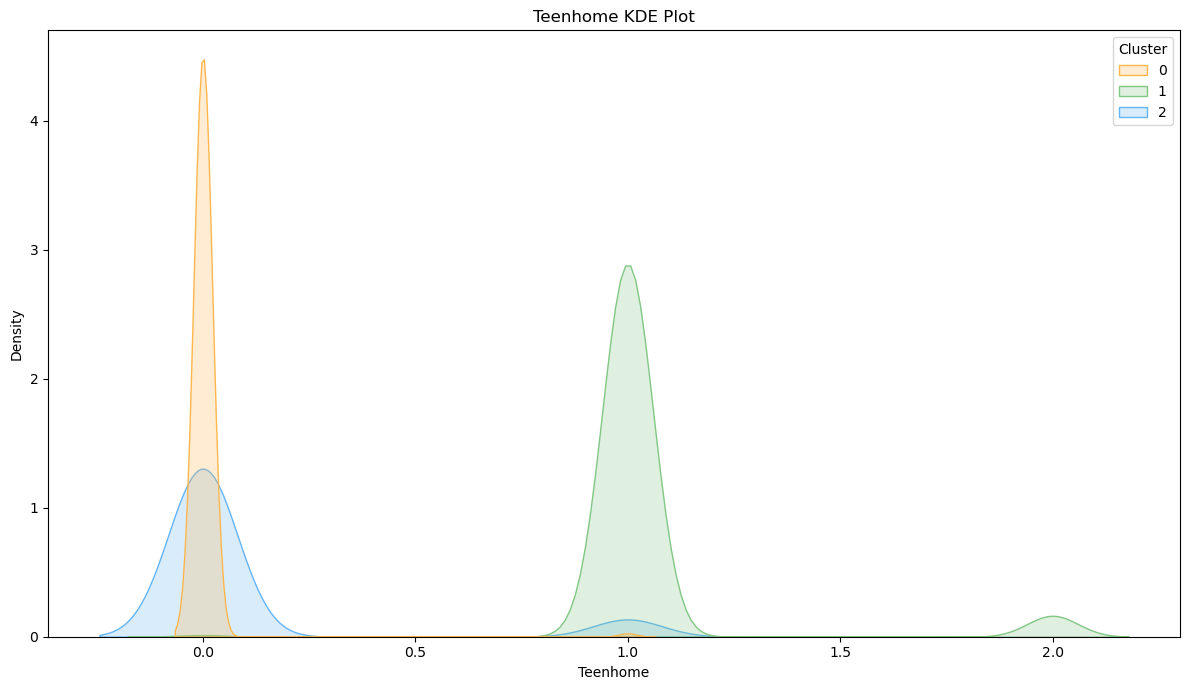


-----------------------------------------------------------------------------------------------------------------------------



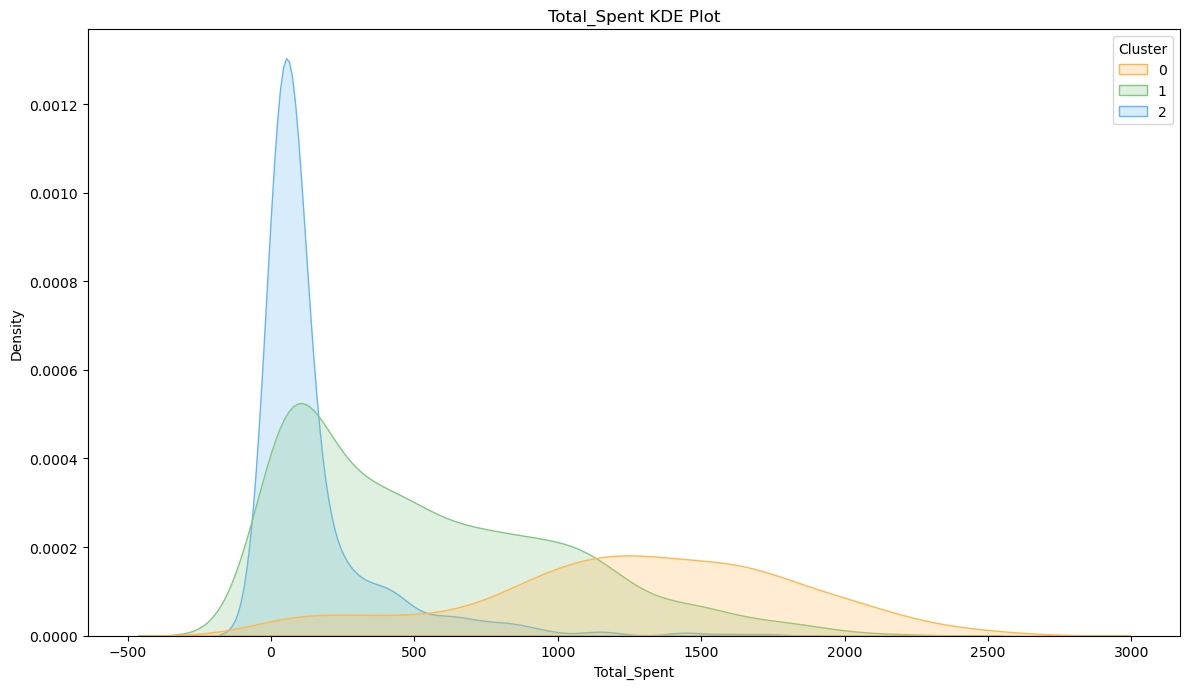


-----------------------------------------------------------------------------------------------------------------------------



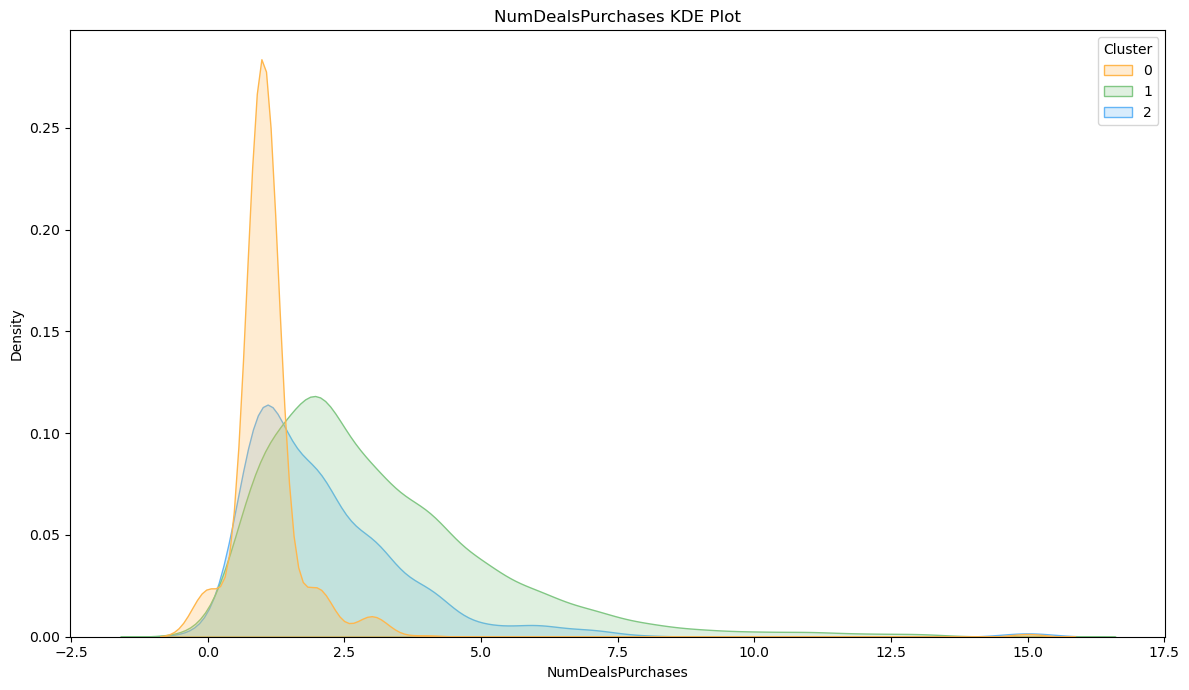


-----------------------------------------------------------------------------------------------------------------------------



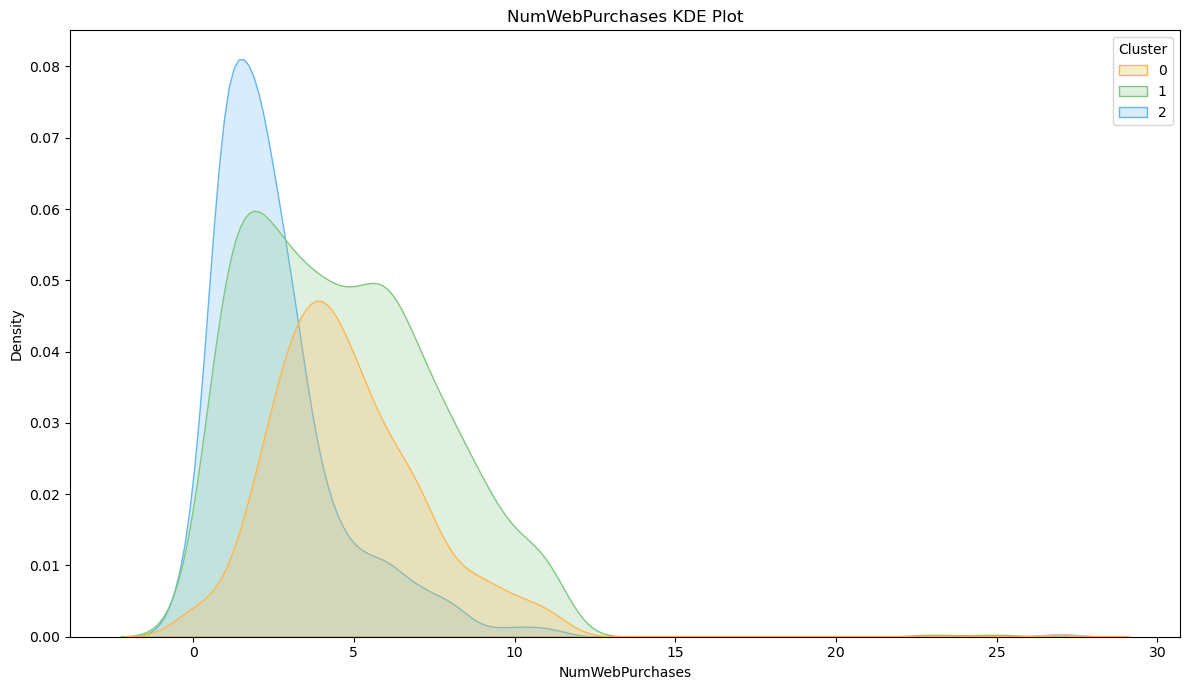


-----------------------------------------------------------------------------------------------------------------------------



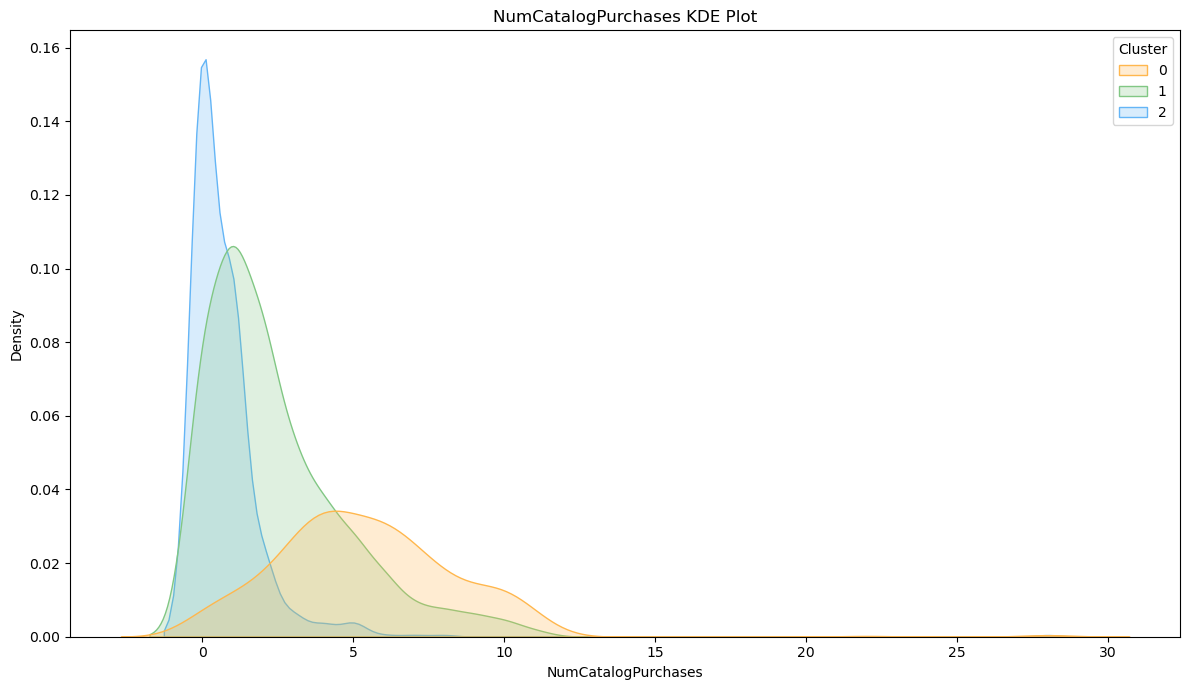


-----------------------------------------------------------------------------------------------------------------------------



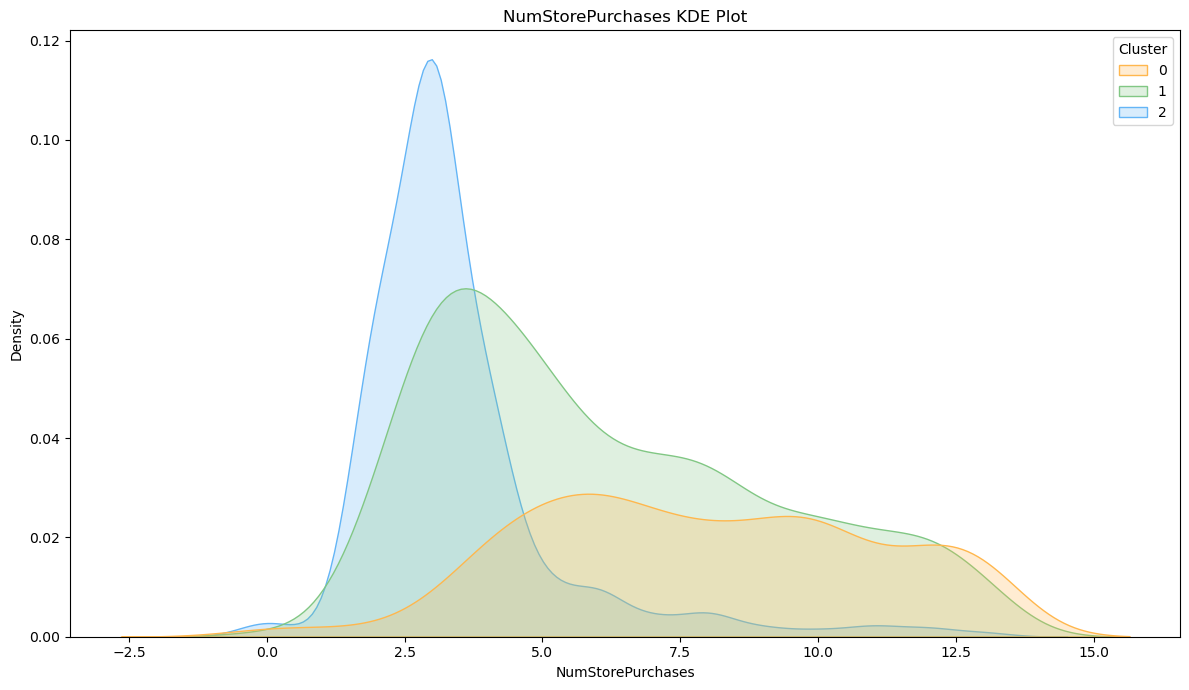


-----------------------------------------------------------------------------------------------------------------------------



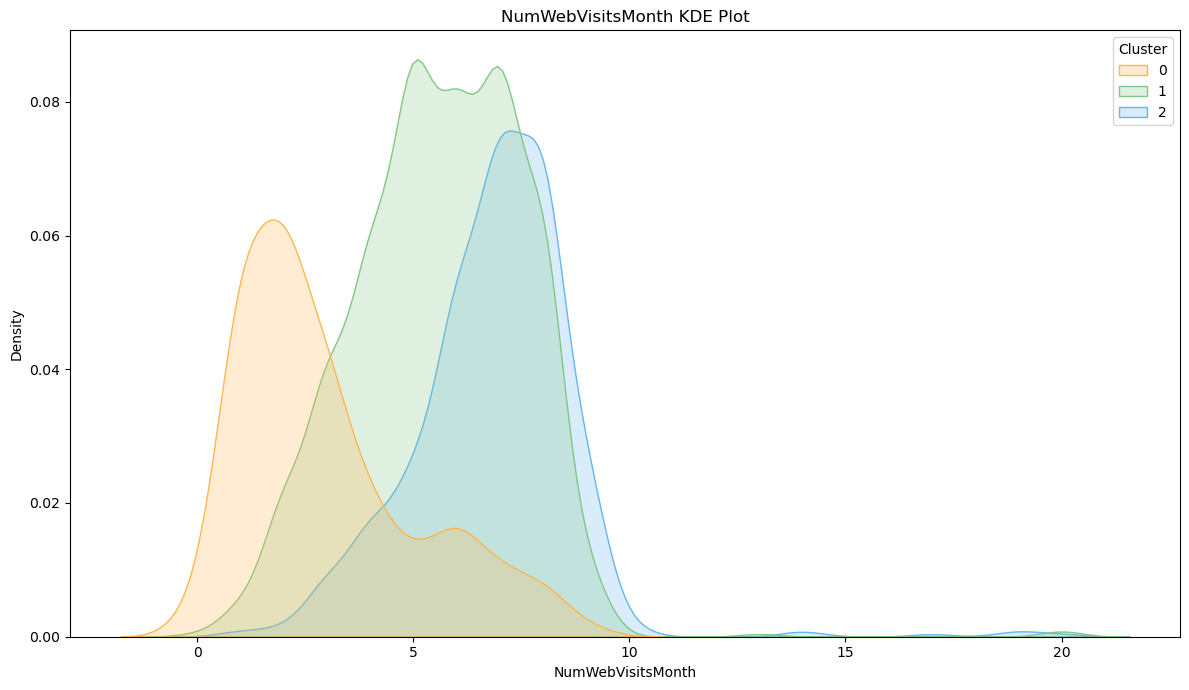


-----------------------------------------------------------------------------------------------------------------------------



In [105]:
for col in num_cols:
  plt.figure(figsize=(12,7))
  sb.kdeplot(data=data_m, x=col, hue='Cluster', fill=True, palette=cust_pal)
  plt.title(f"{col} KDE Plot")
  plt.tight_layout()
  plt.show()

  print('\n' + "-" * 125 + '\n')

#Deploy

In [107]:
#data_m.to_excel('og.xlsx', index=False)
#from google.colab import files
#files.download('og.xlsx')

In [108]:
import pickle

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('encoder_model.pkl', 'wb') as file:
    pickle.dump(encoder, file)

with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)